In [1]:
from IPython.display import Image, display_png

In [2]:
import os
import gc
import time
import math
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.examples.tutorials.mnist import input_data
from scipy.interpolate import make_interp_spline,BSpline

In [3]:
mnist = input_data.read_data_sets(os.path.abspath("./MNIST_data/"), one_hot=False)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## Functions

In [4]:
def get_loss(log_fname, c_lambda):
    # check ltrain-reconst-oss curve
    fname = './log/'+log_fname
    loss_list = []
    with open(fname,'r') as f:
        lines = f.readlines()
        for line in lines:
            tmps = []
            for iline in line.split('\n'):
                for _line in iline.split(','):
                    if len(_line) > 0:
                        tmps.append(float(_line))
            loss_list.append(np.array(tmps))
    
    n = len(loss_list)
    loss_array = np.zeros((n,2))
    loss_array = loss_array.astype(float)
    for idx, i in enumerate(loss_list):
        #print(i, len(i))
        for jdx, j in enumerate(i):
            if jdx == 0:
                loss_array[idx, jdx] = j
            if jdx == 1:
                loss_array[idx, jdx] = j * c_lambda
    return loss_array

-------------
## Compare Image and train loss

62378059: Baseline. Optimizer Adam. Lr=0.001

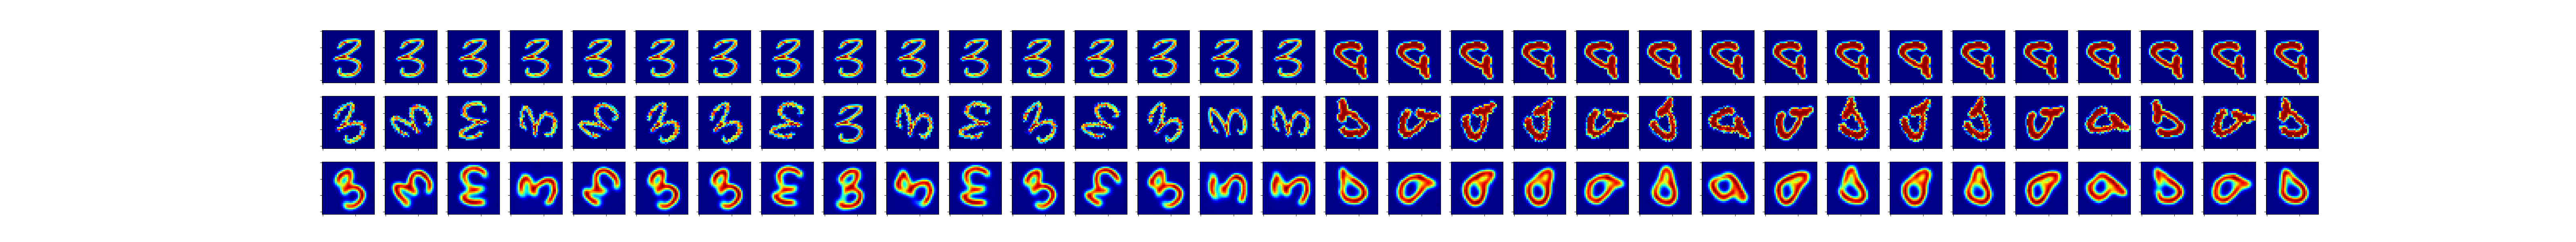

In [4]:
display_png(Image('./fig/fig_62378059_nepoch-1_lr-0.001_nbatch-32_lambda0.001_dangle21567994136.png'))

In [5]:
# check ltrain-reconst-oss curve
log_fname='loss_62378059_nepoch-1_lr-0.001_nbatch-32_lambda0.001_dangle21567994136.txt'
fname = './log/'+log_fname
loss_list = []
with open(fname,'r') as f:
    lines = f.readlines()
    for line in lines:
        loss_list.append(float(line))

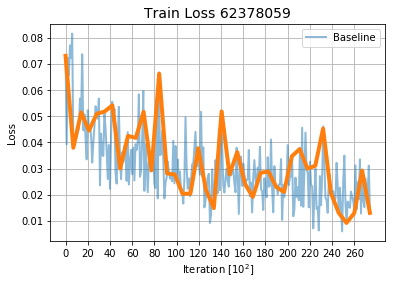

In [6]:
expname='62378059'
x = [i for i in range(len(loss_list))]
plt.figure()
plt.plot(x, loss_list, label='Baseline', linewidth=2, alpha=0.5)
spl = make_interp_spline(x, loss_list, k=5) #BSpline object
xnew = np.linspace(np.min(x),np.max(x),40)
power_smooth = spl(xnew)
plt.plot(xnew, power_smooth, linewidth=4)
plt.title('Train Loss {}'.format(expname), fontsize=14)
plt.ylabel('Loss')
plt.xlabel('Iteration'+r' [$10^2$]')
plt.xticks([i for i in range(0,np.max(x),20)])
plt.legend()
plt.gca().yaxis.grid()
plt.gca().xaxis.grid()
plt.show()

------------
62376186: both new loss. lm=0.0001 adam

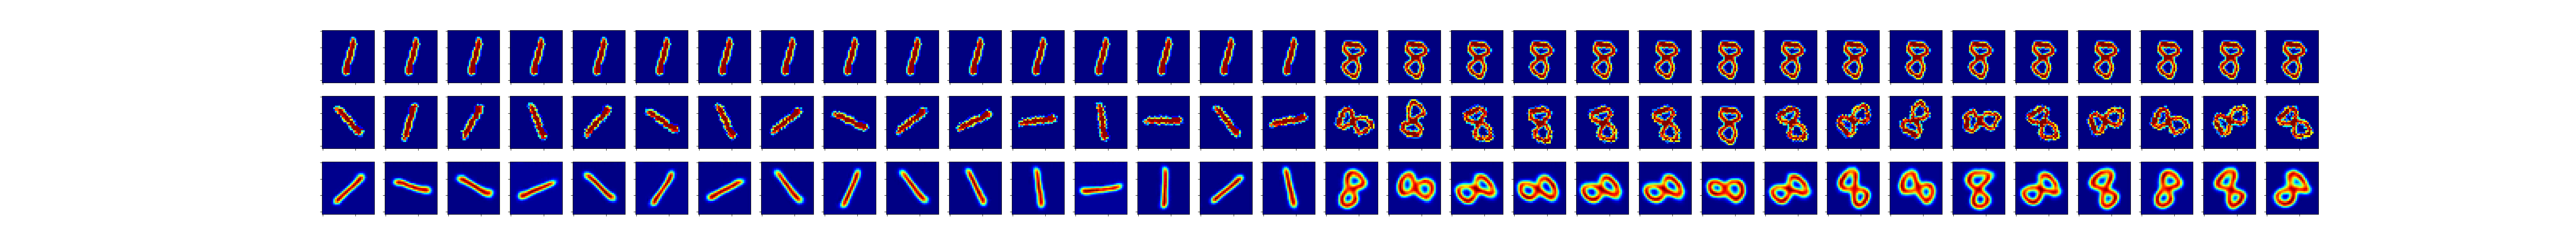

In [13]:
display_png(Image('./fig/fig_62376186_nepoch-1_lr-0.001_nbatch-32_lambda0.0001_dangle21567990574.png'))

In [65]:
loss_array = get_loss('loss_62376186_nepoch-1_lr-0.001_nbatch-32_lambda0.0001_dangle21567990574.txt',
                        c_lambda=0.0001
                     )

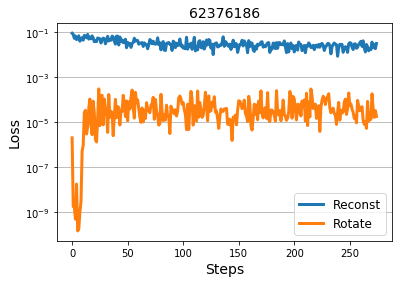

In [66]:
expname='62376186'
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

------------------
62376190: both new loss lm=0.001 adam

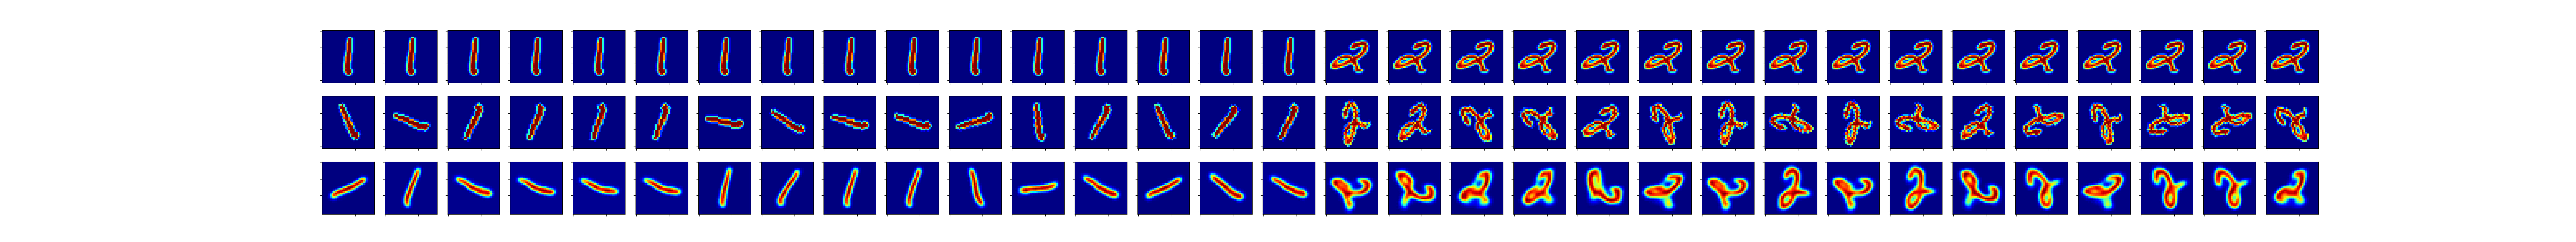

In [63]:
display_png(Image('./fig/fig_62376190_nepoch-1_lr-0.001_nbatch-32_lambda0.001_dangle21567990574.png'))

In [67]:
loss_array = get_loss('loss_62376190_nepoch-1_lr-0.001_nbatch-32_lambda0.001_dangle21567990574.txt',
                        c_lambda=0.001
                     )

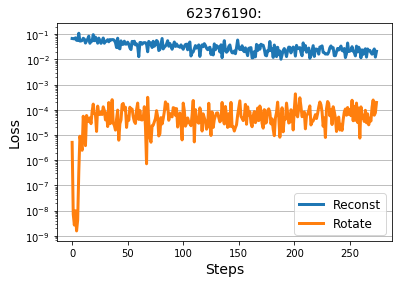

In [68]:
expname='62376190:'
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

62379236: both new loss. lambda 0.01, Adam

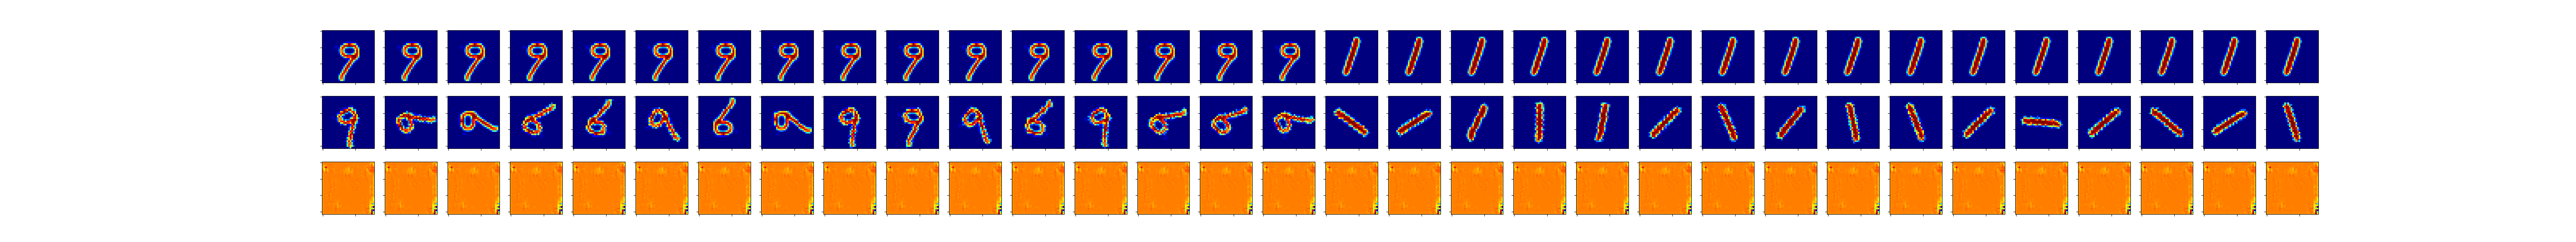

In [70]:
display(Image('./fig/fig_62379236_nepoch-1_lr-0.001_nbatch-32_lambda0.01_dangle21567999124.png'))

In [71]:
loss_array = get_loss('loss_62379236_nepoch-1_lr-0.001_nbatch-32_lambda0.01_dangle21567999124.txt',
                        c_lambda=0.01
                     )

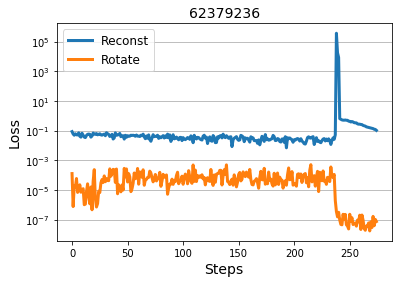

In [72]:
expname='62379236'
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

-------------
62379237: both new loss, lambda 0.1  Adam

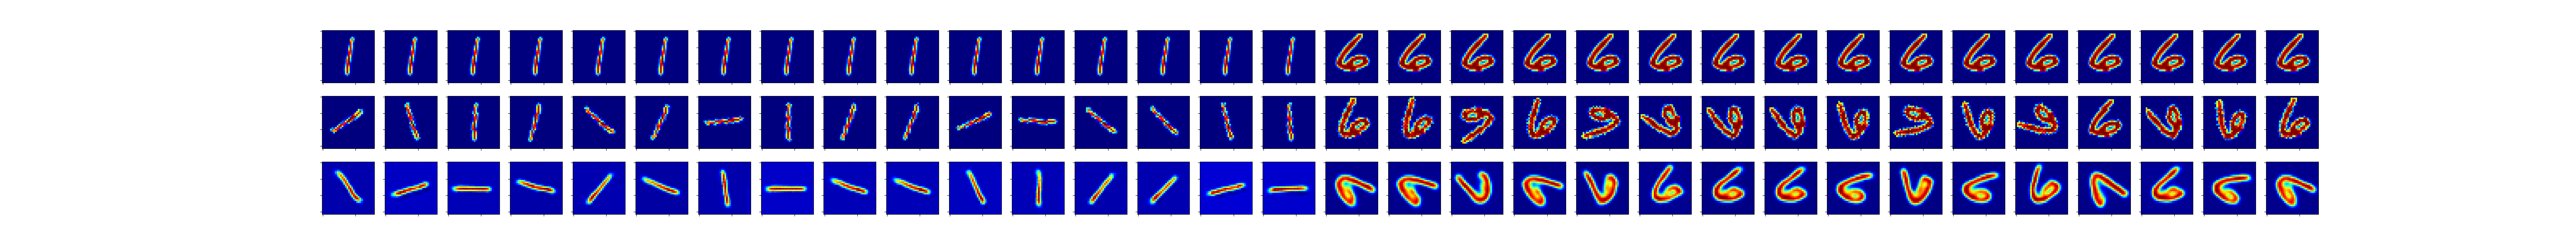

In [73]:
display(Image('./fig/fig_62379237_nepoch-1_lr-0.001_nbatch-32_lambda0.1_dangle21567999124.png'))

In [5]:
logname='loss_62379237_nepoch-1_lr-0.001_nbatch-32_lambda0.1_dangle21567999124.txt'
loss_array = get_loss(logname, c_lambda=0.1)

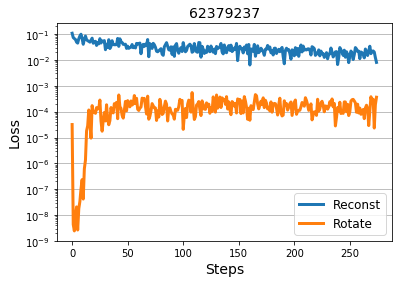

In [6]:
expname='62379237'
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

---------------------
62388825 both loss: lambda 0.25 Adam

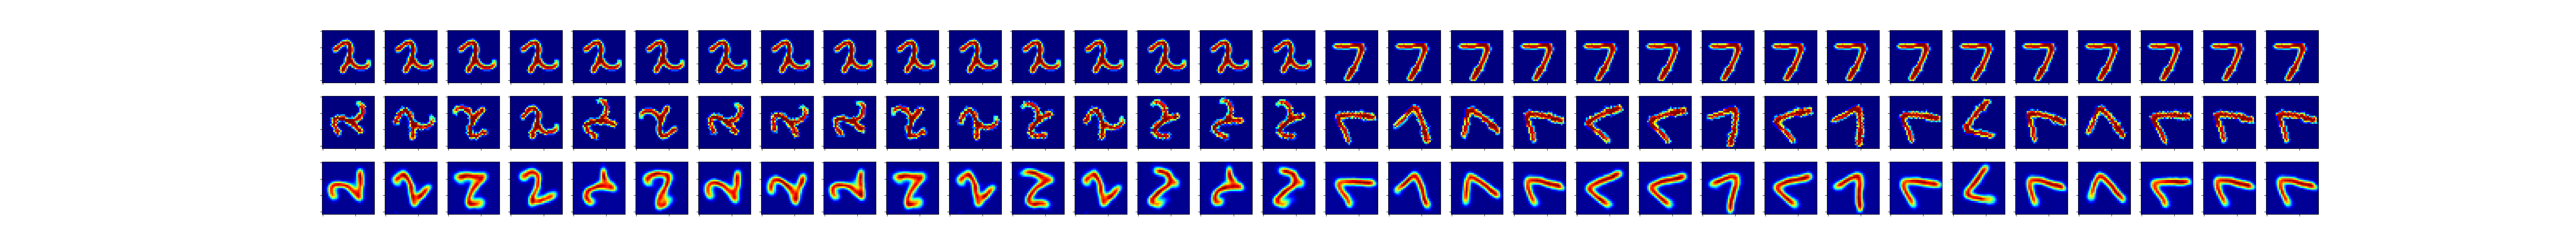

In [4]:
f='fig_62388825_nepoch-1_lr-0.001_nbatch-32_lambda0.25_dangle21568039727.png'
display_png(Image('./fig/'+f))

In [5]:
logname='loss_62388825_nepoch-1_lr-0.001_nbatch-32_lambda0.25_dangle21568039727.txt'
loss_array = get_loss(logname, c_lambda=0.25)

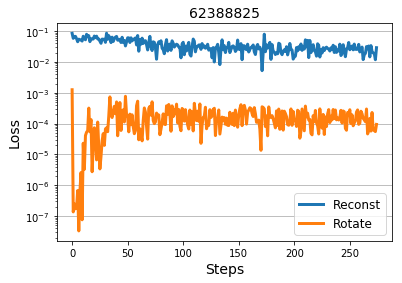

In [6]:
expname='62388825'
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

--------------------
62389342 both loss lambda 0.4 Adam

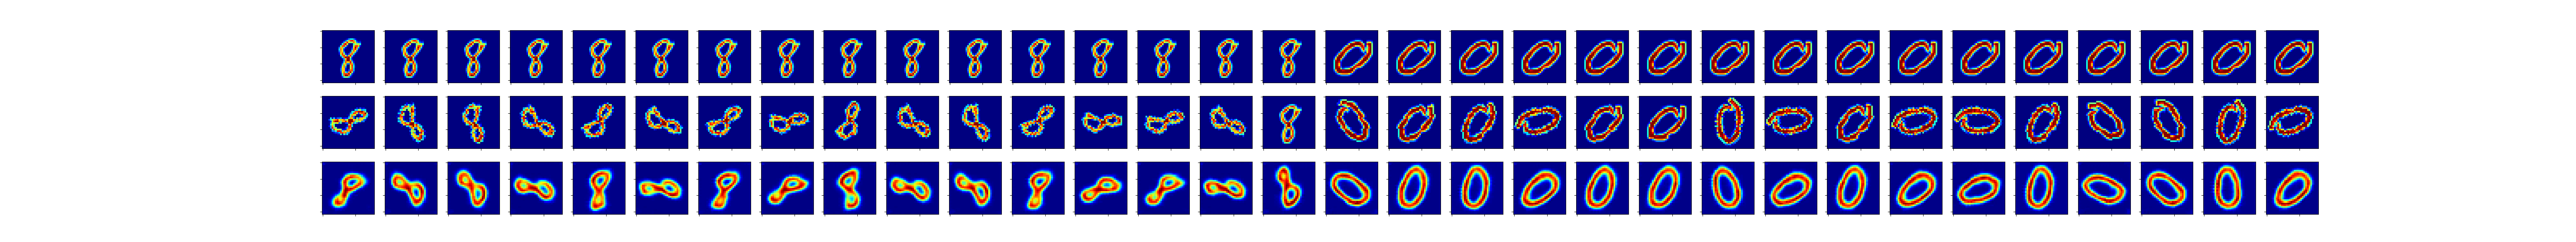

In [10]:
f='fig_62389342_nepoch-1_lr-0.001_nbatch-32_lambda0.4_dangle21568042354.png'
display_png(Image('./fig/'+f))

In [11]:
logname='loss_62389342_nepoch-1_lr-0.001_nbatch-32_lambda0.4_dangle21568042354.txt'
loss_array = get_loss(logname, c_lambda=0.4)

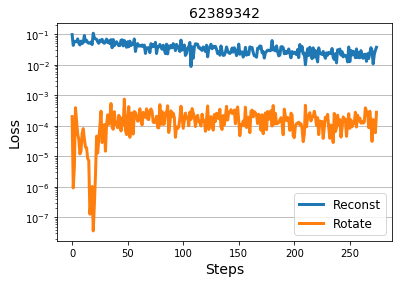

In [12]:
expname='62389342'
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

---------------------
62366561 both loss lambda 0.5 Adam

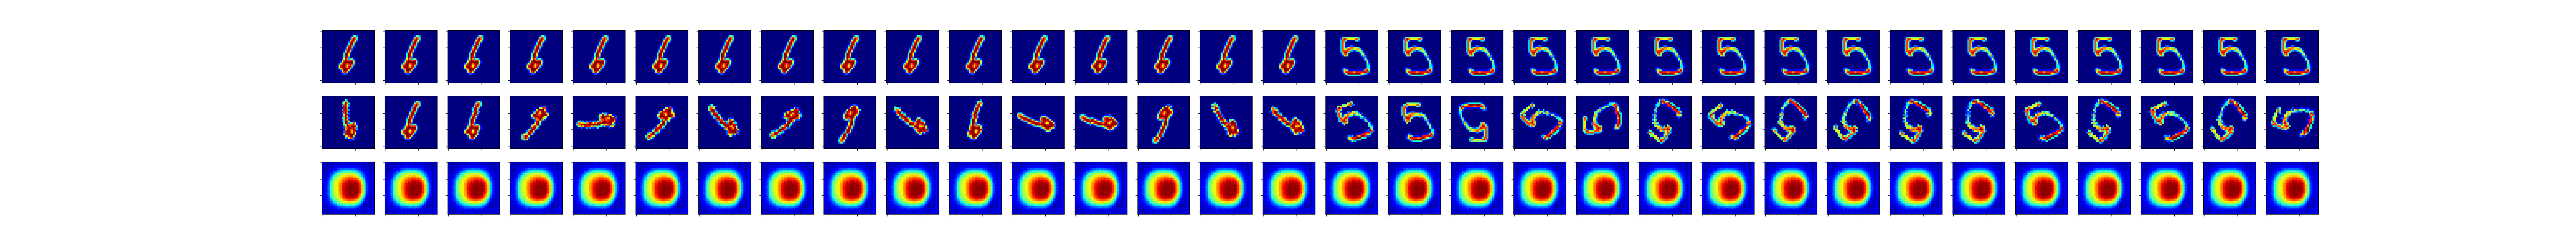

In [7]:
f='fig_62366561_nepoch-1_lr-0.01_nbatch-32_lambda0.5_dangle21567968009.png'
display_png(Image('./fig/'+f))

In [8]:
logname='loss_62366561_nepoch-1_lr-0.01_nbatch-32_lambda0.5_dangle21567968009.txt'
loss_array = get_loss(logname, c_lambda=0.5)

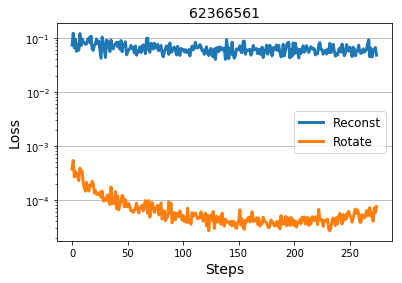

In [9]:
expname='62366561'
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

--------------------
62379297 both loss: lambda 1.0 Adam

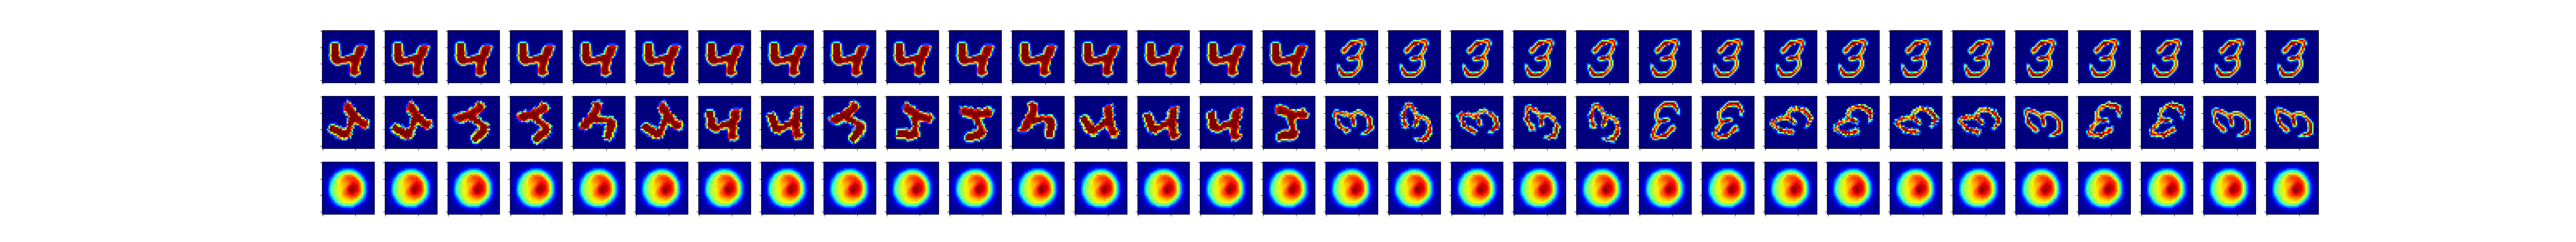

In [76]:
f='fig_62379297_nepoch-1_lr-0.001_nbatch-32_lambda1.0_dangle21567999566.png'
display_png(Image('./fig/'+f))

In [11]:
logname='loss_62379297_nepoch-1_lr-0.001_nbatch-32_lambda1.0_dangle21567999566.txt'
loss_array = get_loss(logname, c_lambda=1.0)

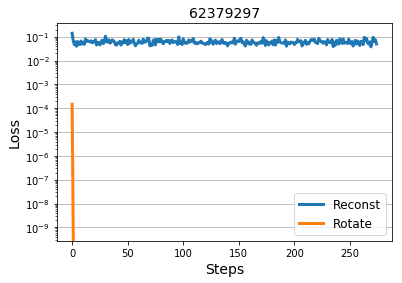

In [12]:
expname='62379297'
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

------------------
62379304 both loss c_lambda 10, Adam

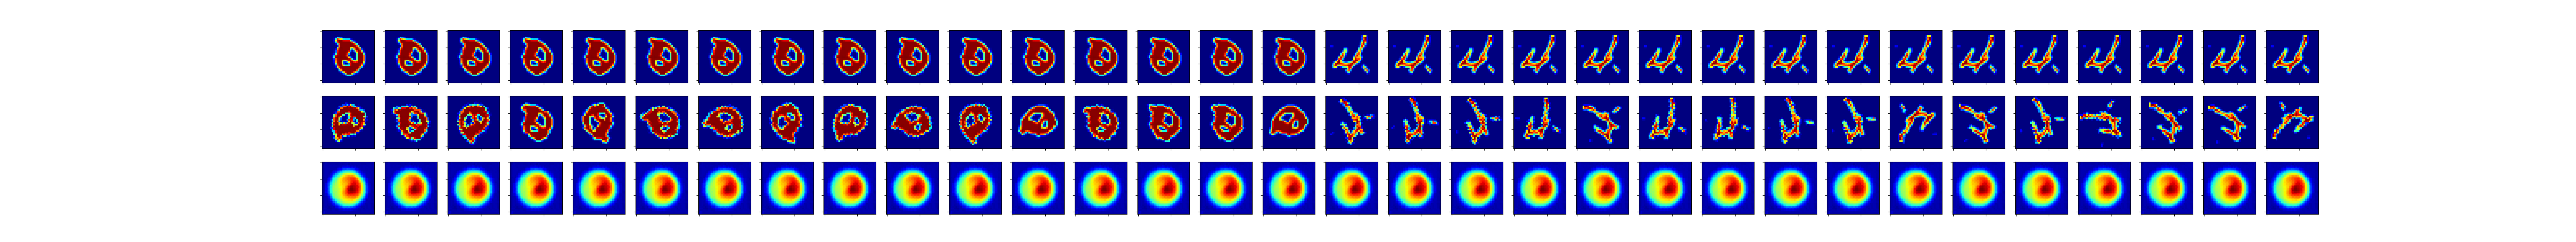

In [13]:
display_png(Image('./fig/fig_62379304_nepoch-1_lr-0.001_nbatch-32_lambda10.0_dangle21567999616.png'))

In [9]:
logname='loss_62379304_nepoch-1_lr-0.001_nbatch-32_lambda10.0_dangle21567999616.txt'
loss_array = get_loss(logname, c_lambda=10.0)

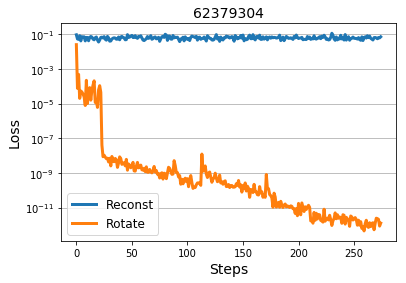

In [10]:
expname='62379304'
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

---------------
#### max of max

62389777 both loss lambda 0.5 adam 

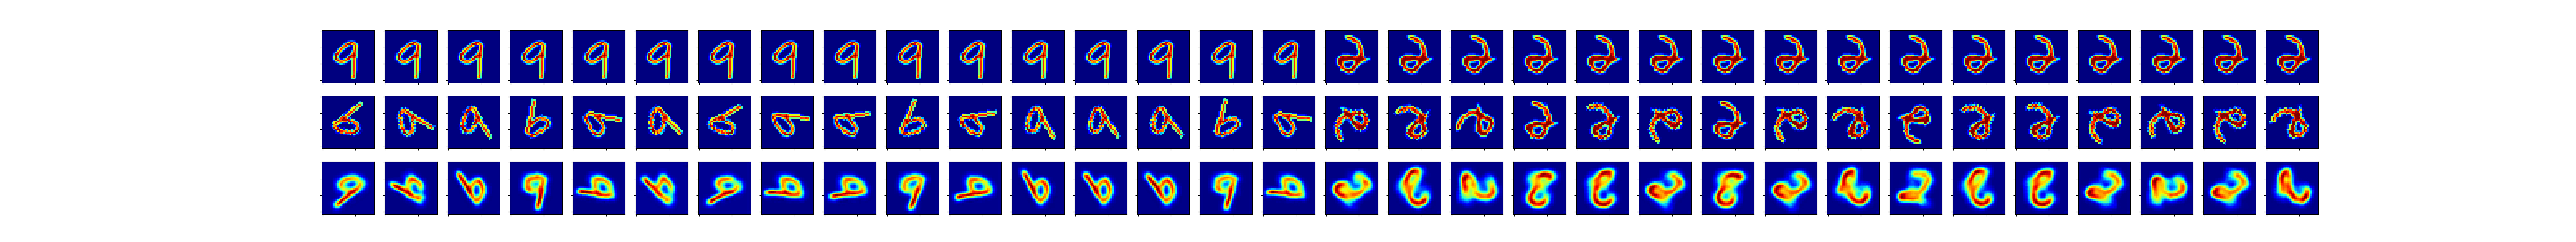

In [3]:
f='fig_62389777_nepoch-1_lr-0.001_nbatch-32_lambda0.5_dangle21568044471.png'
display_png(Image('./fig/'+f))

In [6]:
logname='loss_62389777_nepoch-1_lr-0.001_nbatch-32_lambda0.5_dangle21568044471.txt'
loss_array = get_loss(logname, c_lambda=0.5)

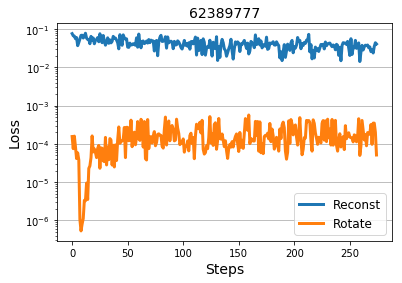

In [7]:
expname='62389777'
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

--------------
## Look latent representation

In [5]:
import sys
import glob

In [6]:
from sklearn.cluster import AgglomerativeClustering

In [7]:
from sklearn.manifold import TSNE

In [8]:
libdir = '/home/tkurihana/scratch-midway2/clouds/src_analysis/lib_hdfs'
sys.path.insert(1,os.path.join(sys.path[0],libdir))

In [299]:
from analysis_lib import get_rand_colors

In [10]:
def load_model(model_dir, epoch, mtype):
    print(" Load {} at {} epoch".format(mtype, epoch))
    model_def = model_dir+'/'+mtype+'.json'
    model_weight = model_dir+'/'+mtype+'-'+str(epoch)+'.h5'
    with open(model_def, "r") as f:
        model = tf.keras.models.model_from_json(f.read())
    model.load_weights(model_weight)
    return model

In [11]:
def resize_fn(img, height=32, width=32):
    return tf.image.resize_images(img, (height, width))

Test Images with resize

In [12]:
# data
x_test = mnist.test.images
x_test = x_test.reshape(-1, 28,28,1)

# labels
y_test = mnist.test.labels

# resize
imgs_tf = resize_fn(x_test)
test_imgs = tf.keras.backend.eval(imgs_tf)

In [13]:
test_imgs.shape

(10000, 32, 32, 1)

Test images dist

In [16]:
embedded = TSNE(n_components=2).fit_transform(test_imgs.reshape(-1,32*32))

In [32]:
colors = get_rand_colors(n=10, cmap_name='tab10')

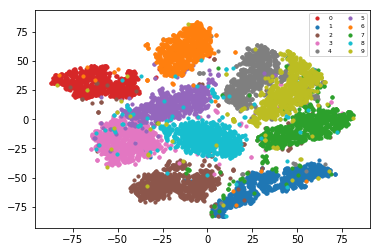

In [40]:
fig = plt.figure()
for i in range(10):
    idx = np.argwhere(y_test == i)
    plt.scatter(embedded[idx, 0], embedded[idx,1], color=colors[i], label=str(i), s=10)
plt.legend(ncol=2,prop={'size': 6})
plt.show()

----------------
62378059: Baseline. Optimizer Adam. Lr=0.001

In [47]:
# directory
model_dir = "./output_model/62378059"
# model
encoder = load_model(model_dir, epoch=0, mtype='encoder')
decoder = load_model(model_dir, epoch=0, mtype='decoder')

 Load encoder at 0 epoch
 Load decoder at 0 epoch


In [48]:
encs = encoder.predict(test_imgs)

In [49]:
encs_mean = encs.mean(axis=(1,2))
print(encs_mean.shape)
features = AgglomerativeClustering(n_clusters=10).fit_predict(encs_mean)

(10000, 128)


In [50]:
embedded_features = TSNE(n_components=2).fit_transform(encs_mean)

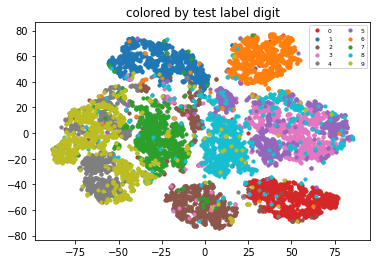

In [51]:
fig = plt.figure()
for i in range(10):
    idx = np.argwhere(y_test == i)
    plt.scatter(embedded_features[idx, 0], embedded_features[idx,1], color=colors[i], label=str(i), s=10)
plt.legend(ncol=2,prop={'size': 6})
plt.title('colored by test label digit')
plt.show()

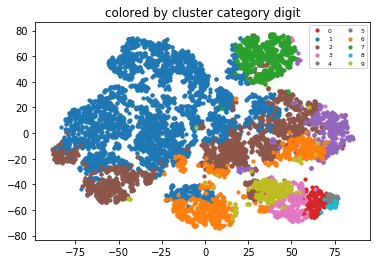

In [52]:
fig = plt.figure()
for i in range(10):
    idx = np.argwhere(features == i)
    plt.scatter(embedded_features[idx, 0], embedded_features[idx,1], color=colors[i], label=str(i), s=10)
plt.legend(ncol=2,prop={'size': 6})
plt.title('colored by cluster category digit')
plt.show()

-----------------------
62388825 both loss: lambda 0.25 Adam

In [54]:
# directory
model_dir = "./output_model/62388825"
# model
encoder = load_model(model_dir, epoch=0, mtype='encoder')
decoder = load_model(model_dir, epoch=0, mtype='decoder')

 Load encoder at 0 epoch
 Load decoder at 0 epoch


In [55]:
encs = encoder.predict(test_imgs)
encs.shape

(10000, 2, 2, 128)

In [56]:
encs_mean = encs.mean(axis=(1,2))
print(encs_mean.shape)
features = AgglomerativeClustering(n_clusters=10).fit_predict(encs_mean)

(10000, 128)


In [57]:
embedded_features = TSNE(n_components=2, perplexity=15.0).fit_transform(encs_mean)

perplexity = 30 (default of tsne in sckit-learn)

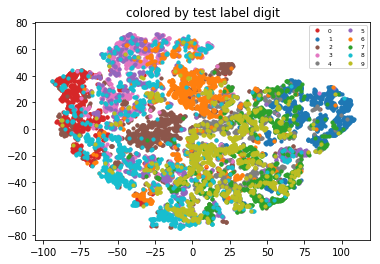

In [44]:
fig = plt.figure()
for i in range(10):
    idx = np.argwhere(y_test == i)
    plt.scatter(embedded_features[idx, 0], embedded_features[idx,1], color=colors[i], label=str(i), s=10)
plt.legend(ncol=2,prop={'size': 6})
plt.title('colored by test label digit')
plt.show()

perplexity =15

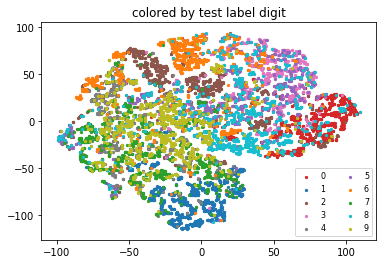

In [61]:
fig = plt.figure()
for i in range(10):
    idx = np.argwhere(y_test == i)
    plt.scatter(embedded_features[idx, 0], embedded_features[idx,1], color=colors[i], label=str(i), s=5)
plt.legend(ncol=2,prop={'size': 8})
plt.title('colored by test label digit')
plt.show()

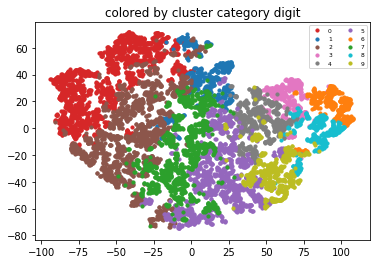

In [46]:
fig = plt.figure()
for i in range(10):
    idx = np.argwhere(features == i)
    plt.scatter(embedded_features[idx, 0], embedded_features[idx,1], color=colors[i], label=str(i), s=10)
plt.legend(ncol=2,prop={'size': 6})
plt.title('colored by cluster category digit')
plt.show()

----------------------------
62376190: both new loss lm=0.001 adam

In [71]:
# directory
model_dir = "./output_model/62376190"
# model
encoder = load_model(model_dir, epoch=0, mtype='encoder')

 Load encoder at 0 epoch


In [72]:
encs = encoder.predict(test_imgs)
encs_mean = encs.mean(axis=(1,2))
print(encs_mean.shape)
embedded_features = TSNE(n_components=2, perplexity=30.0).fit_transform(encs_mean)

(10000, 128)


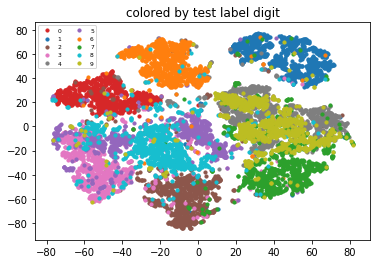

In [73]:
fig = plt.figure()
for i in range(10):
    idx = np.argwhere(y_test == i)
    plt.scatter(embedded_features[idx, 0], embedded_features[idx,1], color=colors[i], label=str(i), s=10)
plt.legend(ncol=2,prop={'size': 6})
plt.title('colored by test label digit')
plt.show()

----------------
62389342 both loss lambda 0.4 Adam

In [62]:
# directory
model_dir = "./output_model/62389342"
# model
encoder = load_model(model_dir, epoch=0, mtype='encoder')

 Load encoder at 0 epoch


In [63]:
encs = encoder.predict(test_imgs)
encs_mean = encs.mean(axis=(1,2))
print(encs_mean.shape)
embedded_features = TSNE(n_components=2, perplexity=30.0).fit_transform(encs_mean)

(10000, 128)


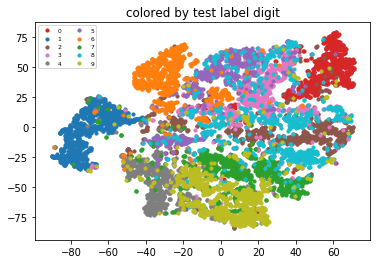

In [64]:
fig = plt.figure()
for i in range(10):
    idx = np.argwhere(y_test == i)
    plt.scatter(embedded_features[idx, 0], embedded_features[idx,1], color=colors[i], label=str(i), s=10)
plt.legend(ncol=2,prop={'size': 6})
plt.title('colored by test label digit')
plt.show()

---------------------------------
62379297 both loss: lambda 1.0 Adam

In [68]:
# directory
model_dir = "./output_model/62379297"
# model
encoder = load_model(model_dir, epoch=0, mtype='encoder')

 Load encoder at 0 epoch


In [69]:
encs = encoder.predict(test_imgs)
encs_mean = encs.mean(axis=(1,2))
print(encs_mean.shape)
embedded_features = TSNE(n_components=2, perplexity=30.0).fit_transform(encs_mean)

(10000, 128)


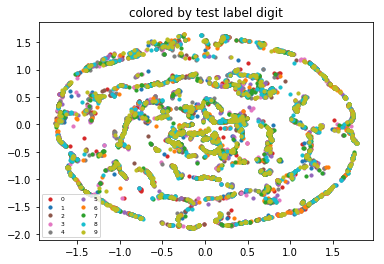

In [70]:
fig = plt.figure()
for i in range(10):
    idx = np.argwhere(y_test == i)
    plt.scatter(embedded_features[idx, 0], embedded_features[idx,1], color=colors[i], label=str(i), s=10)
plt.legend(ncol=2,prop={'size': 6})
plt.title('colored by test label digit')
plt.show()

--------------------
62379304 both loss c_lambda 10, Adam

In [65]:
# directory
model_dir = "./output_model/62379304"
# model
encoder = load_model(model_dir, epoch=0, mtype='encoder')

 Load encoder at 0 epoch


In [66]:
encs = encoder.predict(test_imgs)
encs_mean = encs.mean(axis=(1,2))
print(encs_mean.shape)
embedded_features = TSNE(n_components=2, perplexity=30.0).fit_transform(encs_mean)

(10000, 128)


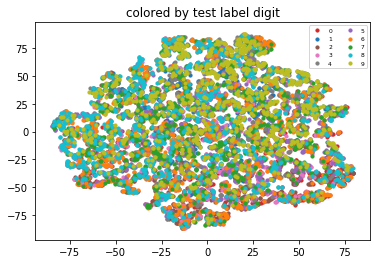

In [67]:
fig = plt.figure()
for i in range(10):
    idx = np.argwhere(y_test == i)
    plt.scatter(embedded_features[idx, 0], embedded_features[idx,1], color=colors[i], label=str(i), s=10)
plt.legend(ncol=2,prop={'size': 6})
plt.title('colored by test label digit')
plt.show()

-------------------
## SGD + max of max

62392285 :baseline

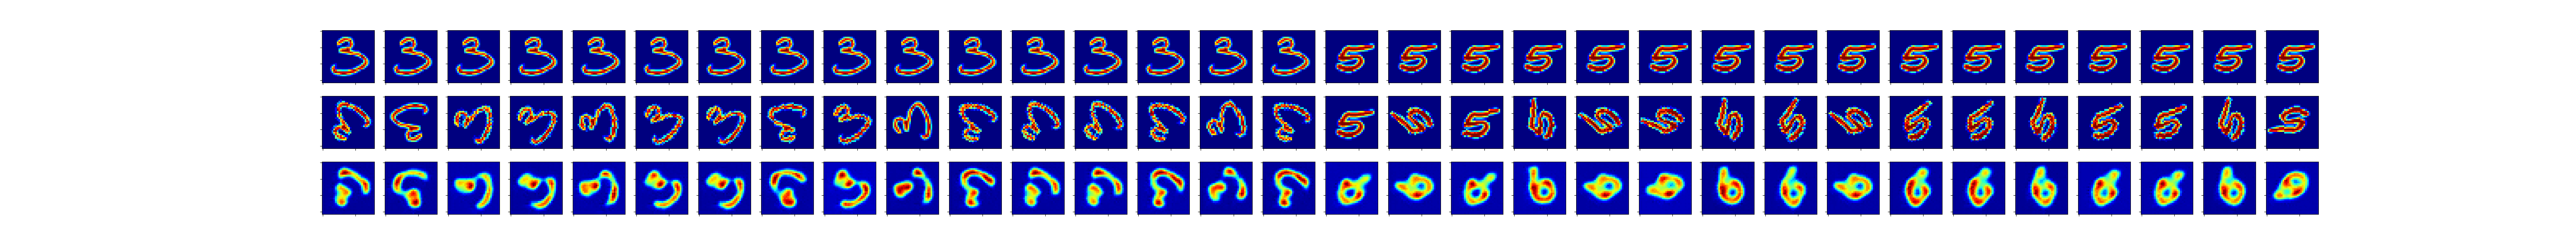

In [101]:
expname = '62392285'
display_png(Image(glob.glob('./fig/*'+expname+'*.png')[0]))

In [102]:
# check ltrain-reconst-oss curve
log_fname='loss_62392285_nepoch-1_lr-0.01_nbatch-32_lambda0.1_dangle21568057407.txt'
fname = './log/'+log_fname
loss_list = []
with open(fname,'r') as f:
    lines = f.readlines()
    for line in lines:
        loss_list.append(float(line))

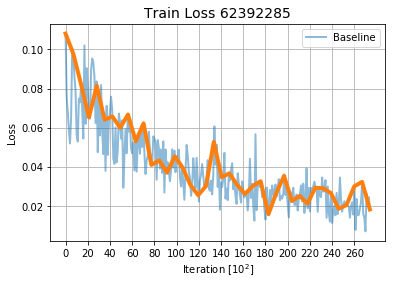

In [103]:
#expname='62378059'
x = [i for i in range(len(loss_list))]
plt.figure()
plt.plot(x, loss_list, label='Baseline', linewidth=2, alpha=0.5)
spl = make_interp_spline(x, loss_list, k=5) #BSpline object
xnew = np.linspace(np.min(x),np.max(x),40)
power_smooth = spl(xnew)
plt.plot(xnew, power_smooth, linewidth=4)
plt.title('Train Loss {}'.format(expname), fontsize=14)
plt.ylabel('Loss')
plt.xlabel('Iteration'+r' [$10^2$]')
plt.xticks([i for i in range(0,np.max(x),20)])
plt.legend()
plt.gca().yaxis.grid()
plt.gca().xaxis.grid()
plt.show()

In [ ]:
x = [i for i in range(len(loss_list))]
plt.figure()
plt.plot(x, loss_list, label='Baseline', linewidth=2, alpha=0.5)
spl = make_interp_spline(x, loss_list, k=5) #BSpline object
xnew = np.linspace(np.min(x),np.max(x),40)
power_smooth = spl(xnew)
plt.plot(xnew, power_smooth, linewidth=4)
plt.title('Train Loss {}'.format(expname), fontsize=14)
plt.ylabel('Loss')
plt.xlabel('Iteration'+r' [$10^2$]')
plt.xticks([i for i in range(0,np.max(x),20)])
plt.legend()
plt.gca().yaxis.grid()
plt.gca().xaxis.grid()
plt.show()

In [104]:
# directory
model_dir = "./output_model/"+expname
encoder = load_model(model_dir, epoch=0, mtype='encoder')

 Load encoder at 0 epoch


In [105]:
encs = encoder.predict(test_imgs)
encs_mean = encs.mean(axis=(1,2))
embedded_features = TSNE(n_components=2, perplexity=30.0).fit_transform(encs_mean)

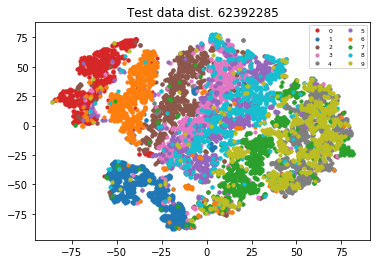

In [106]:
fig = plt.figure()
for i in range(10):
    idx = np.argwhere(y_test == i)
    plt.scatter(embedded_features[idx, 0], embedded_features[idx,1], color=colors[i], label=str(i), s=10)
plt.legend(ncol=2,prop={'size': 6})
plt.title('Test data dist. {}'.format(expname))
plt.show()

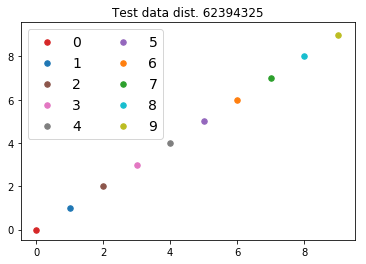

In [240]:
fig = plt.figure()
x = [i for i in range(10)]
for i in range(10):
    plt.scatter(x[i],x[i], color=colors[i], label=str(i), s=30)
plt.legend(ncol=2,prop={'size': 14})
plt.title('Test data dist. {}'.format(expname))
plt.show()

##### Only rotate 62392510 + (max + mean in rotate fn)

In [129]:
# check ltrain-reconst-oss curve
expname='62392510'
fname = glob.glob('./log/*'+expname+'*.txt')[0]
loss_list = []
with open(fname,'r') as f:
    lines = f.readlines()
    for line in lines:
        loss_list.append(float(line))

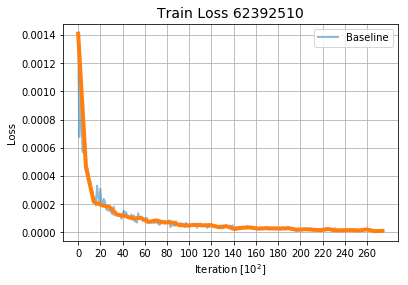

In [130]:
x = [i for i in range(len(loss_list))]
plt.figure()
plt.plot(x, loss_list, label='Baseline', linewidth=2, alpha=0.5)
spl = make_interp_spline(x, loss_list, k=5) #BSpline object
xnew = np.linspace(np.min(x),np.max(x),40)
power_smooth = spl(xnew)
plt.plot(xnew, power_smooth, linewidth=4)
plt.title('Train Loss {}'.format(expname), fontsize=14)
plt.ylabel('Loss')
plt.xlabel('Iteration'+r' [$10^2$]')
plt.xticks([i for i in range(0,np.max(x),20)])
plt.legend()
plt.gca().yaxis.grid()
plt.gca().xaxis.grid()
plt.show()

In [131]:
# directory
model_dir = "./output_model/"+expname
encoder = load_model(model_dir, epoch=0, mtype='encoder')

 Load encoder at 0 epoch


In [132]:
encs = encoder.predict(test_imgs)
encs_mean = encs.mean(axis=(1,2))
embedded_features = TSNE(n_components=2, perplexity=30.0).fit_transform(encs_mean)

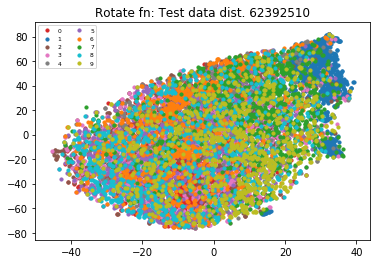

In [133]:
fig = plt.figure()
for i in range(10):
    idx = np.argwhere(y_test == i)
    plt.scatter(embedded_features[idx, 0], embedded_features[idx,1], color=colors[i], label=str(i), s=10)
plt.legend(ncol=2,prop={'size': 6})
plt.title('Rotate fn: Test data dist. {}'.format(expname))
plt.show()

-------------------
#### Only rotate 62392994 + (max + max in rotate fn)

In [134]:
# check ltrain-reconst-oss curve
expname='62392994'
fname = glob.glob('./log/*'+expname+'*.txt')[0]
loss_list = []
with open(fname,'r') as f:
    lines = f.readlines()
    for line in lines:
        loss_list.append(float(line))

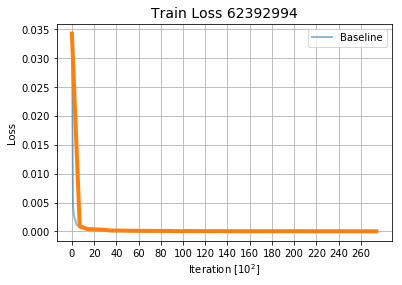

In [135]:
x = [i for i in range(len(loss_list))]
plt.figure()
plt.plot(x, loss_list, label='Baseline', linewidth=2, alpha=0.5)
spl = make_interp_spline(x, loss_list, k=5) #BSpline object
xnew = np.linspace(np.min(x),np.max(x),40)
power_smooth = spl(xnew)
plt.plot(xnew, power_smooth, linewidth=4)
plt.title('Train Loss {}'.format(expname), fontsize=14)
plt.ylabel('Loss')
plt.xlabel('Iteration'+r' [$10^2$]')
plt.xticks([i for i in range(0,np.max(x),20)])
plt.legend()
plt.gca().yaxis.grid()
plt.gca().xaxis.grid()
plt.show()

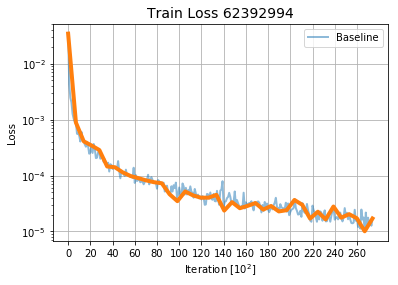

In [136]:
x = [i for i in range(len(loss_list))]
plt.figure()
plt.plot(x, loss_list, label='Baseline', linewidth=2, alpha=0.5)
spl = make_interp_spline(x, loss_list, k=5) #BSpline object
xnew = np.linspace(np.min(x),np.max(x),40)
power_smooth = spl(xnew)
plt.plot(xnew, power_smooth, linewidth=4)
plt.title('Train Loss {}'.format(expname), fontsize=14)
plt.ylabel('Loss')
plt.xlabel('Iteration'+r' [$10^2$]')
plt.xticks([i for i in range(0,np.max(x),20)])
plt.legend()
plt.gca().yaxis.grid()
plt.gca().xaxis.grid()
plt.yscale('log')
plt.show()

In [137]:
# directory
model_dir = "./output_model/"+expname
encoder = load_model(model_dir, epoch=0, mtype='encoder')

 Load encoder at 0 epoch


In [138]:
encs = encoder.predict(test_imgs)
encs_mean = encs.mean(axis=(1,2))
embedded_features = TSNE(n_components=2, perplexity=30.0).fit_transform(encs_mean)

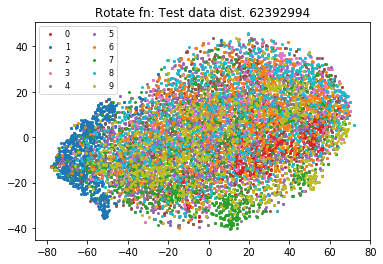

In [142]:
fig = plt.figure()
for i in range(10):
    idx = np.argwhere(y_test == i)
    plt.scatter(embedded_features[idx, 0], embedded_features[idx,1], color=colors[i], label=str(i), s=4)
plt.legend(ncol=2,prop={'size': 8})
plt.title('Rotate fn: Test data dist. {}'.format(expname))
plt.show()

##### Only Reconst 62393762

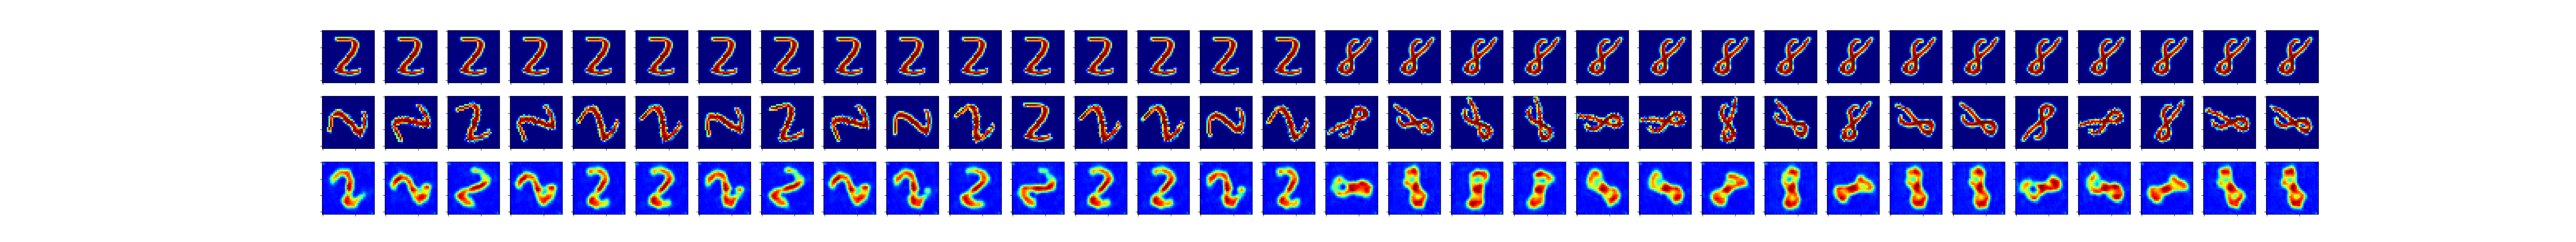

In [158]:
display_png(Image('./fig/fig_62393762_nepoch-1_lr-0.01_nbatch-32_lambda1.0_dangle21568064103.png'))

In [155]:
# check ltrain-reconst-oss curve
expname='62393762'
fname = glob.glob('./log/*'+expname+'*.txt')[0]
loss_list = []
with open(fname,'r') as f:
    lines = f.readlines()
    for line in lines:
        loss_list.append(float(line))

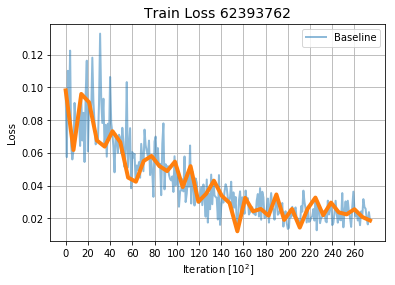

In [156]:
x = [i for i in range(len(loss_list))]
plt.figure()
plt.plot(x, loss_list, label='Baseline', linewidth=2, alpha=0.5)
spl = make_interp_spline(x, loss_list, k=5) #BSpline object
xnew = np.linspace(np.min(x),np.max(x),40)
power_smooth = spl(xnew)
plt.plot(xnew, power_smooth, linewidth=4)
plt.title('Train Loss {}'.format(expname), fontsize=14)
plt.ylabel('Loss')
plt.xlabel('Iteration'+r' [$10^2$]')
plt.xticks([i for i in range(0,np.max(x),20)])
plt.legend()
plt.gca().yaxis.grid()
plt.gca().xaxis.grid()
plt.show()

In [157]:
# directory
model_dir = "./output_model/"+expname
encoder = load_model(model_dir, epoch=0, mtype='encoder')

 Load encoder at 0 epoch


In [159]:
encs = encoder.predict(test_imgs)
encs_mean = encs.mean(axis=(1,2))
embedded_features = TSNE(n_components=2, perplexity=30.0).fit_transform(encs_mean)

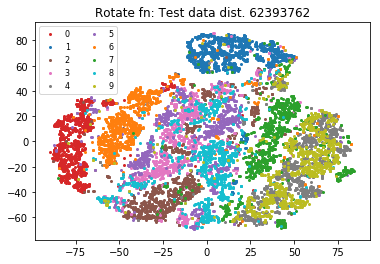

In [160]:
fig = plt.figure()
for i in range(10):
    idx = np.argwhere(y_test == i)
    plt.scatter(embedded_features[idx, 0], embedded_features[idx,1], color=colors[i], label=str(i), s=4)
plt.legend(ncol=2,prop={'size': 8})
plt.title('Rotate fn: Test data dist. {}'.format(expname))
plt.show()

#### Compare with baseline

In [169]:
def single_get_loss(expname):
    fname = glob.glob('./log/*'+str(expname)+'*.txt')[0]
    loss_list = []
    with open(fname,'r') as f:
        lines = f.readlines()
        for line in lines:
            loss_list.append(float(line))
    return loss_list

In [170]:
# baseline
baseline_loss = single_get_loss('62392285')
# rotate
rotate_only_loss = single_get_loss('62392994')
# reconst
reconst_only_loss = single_get_loss('62393762')

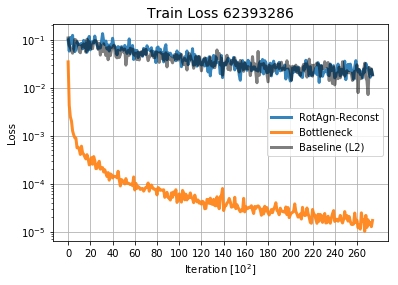

In [179]:
x = [i for i in range(len(baseline_loss))]
plt.figure()
#
plt.plot(x, reconst_only_loss, label='RotAgn-Reconst', linewidth=3, alpha=0.9)
plt.plot(x, rotate_only_loss, label='Bottleneck', linewidth=3, alpha=0.9)
plt.plot(x, baseline_loss, label='Baseline (L2)', linewidth=3, alpha=0.5, color='black')

plt.title('Train Loss {}'.format(expname), fontsize=14)
plt.ylabel('Loss')
plt.xlabel('Iteration'+r' [$10^2$]')
plt.xticks([i for i in range(0,np.max(x),20)])
plt.legend()
plt.gca().yaxis.grid()
plt.gca().xaxis.grid()
plt.yscale('log')
plt.show()

### Hyper-param search
-------------------
62391877: both loss sgd 0.1 lamda 0.5

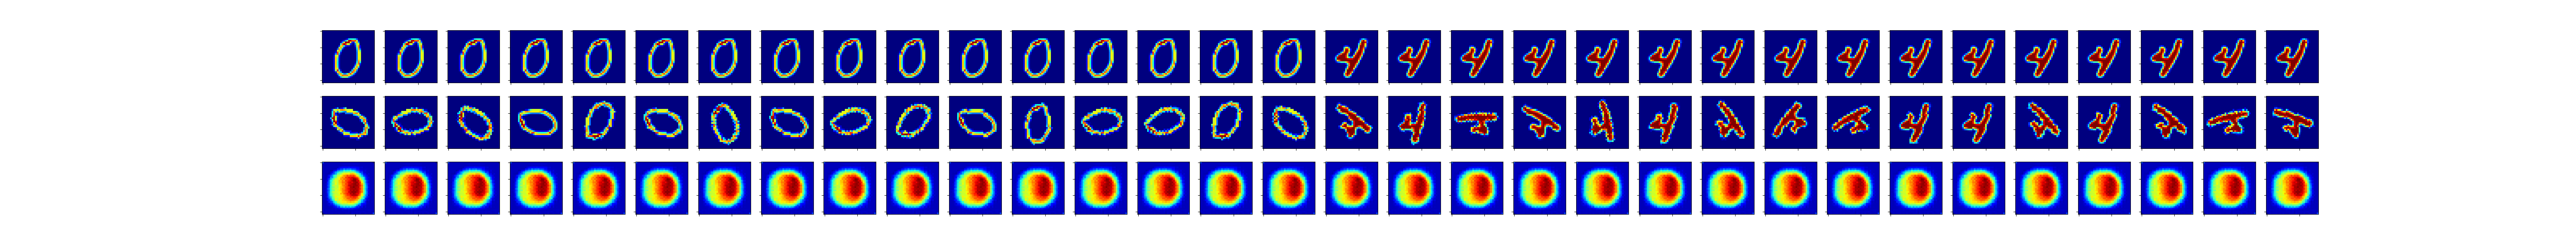

In [107]:
expname = '62391877'
display_png(Image(glob.glob('./fig/*'+expname+'*.png')[0]))

In [81]:
logname=os.path.basename(glob.glob('./log/*'+expname+'*.txt')[0])
loss_array = get_loss(logname, c_lambda=0.50)

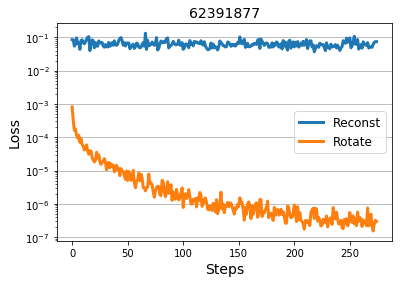

In [82]:
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

In [108]:
# directory
model_dir = "./output_model/"+expname
encoder = load_model(model_dir, epoch=0, mtype='encoder')

 Load encoder at 0 epoch


In [109]:
encs = encoder.predict(test_imgs)
encs_mean = encs.mean(axis=(1,2))
embedded_features = TSNE(n_components=2, perplexity=30.0).fit_transform(encs_mean)

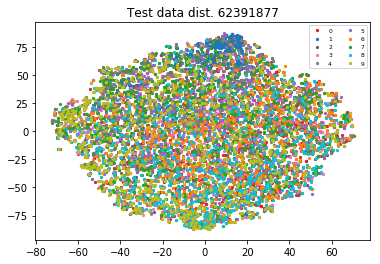

In [111]:
fig = plt.figure()
for i in range(10):
    idx = np.argwhere(y_test == i)
    plt.scatter(embedded_features[idx, 0], embedded_features[idx,1], color=colors[i], label=str(i), s=5)
plt.legend(ncol=2,prop={'size': 6})
plt.title('Test data dist. {}'.format(expname))
plt.show()

------------------
62392000: both loss sgd 0.01 lambda 0.5 

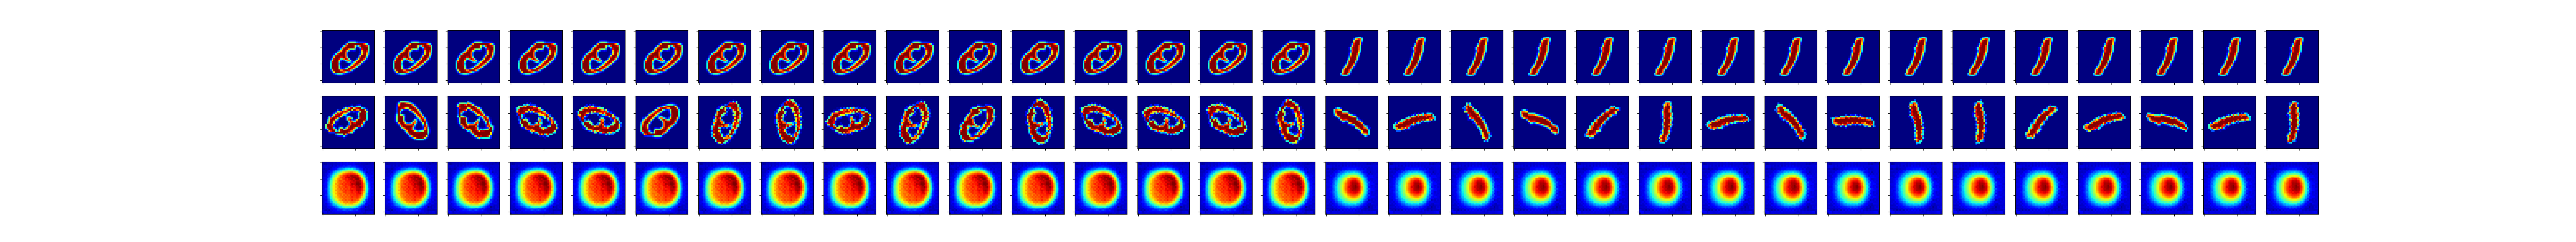

In [83]:
expname = '62392000'
display_png(Image(glob.glob('./fig/*'+expname+'*.png')[0]))

In [84]:
logname=os.path.basename(glob.glob('./log/*'+expname+'*.txt')[0])
loss_array = get_loss(logname, c_lambda=0.50)

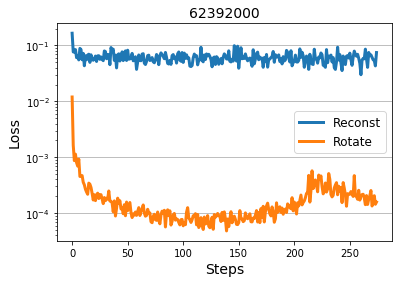

In [85]:
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

-----------------------
 62392091 both loss sgd 0.01, lambda 0.25

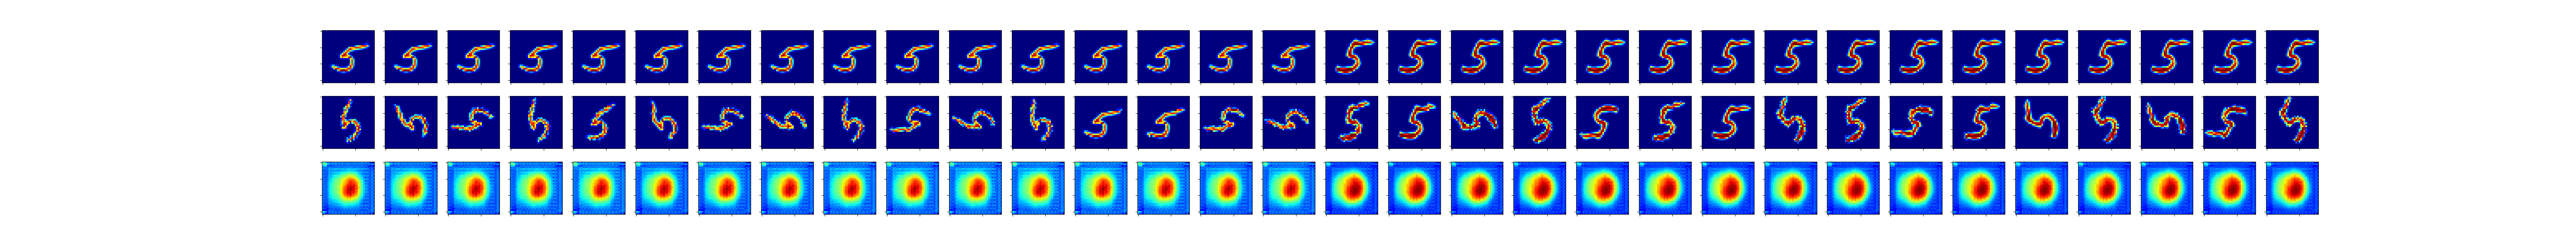

In [86]:
expname = '62392091'
display_png(Image(glob.glob('./fig/*'+expname+'*.png')[0]))

In [87]:
logname=os.path.basename(glob.glob('./log/*'+expname+'*.txt')[0])
loss_array = get_loss(logname, c_lambda=0.25)

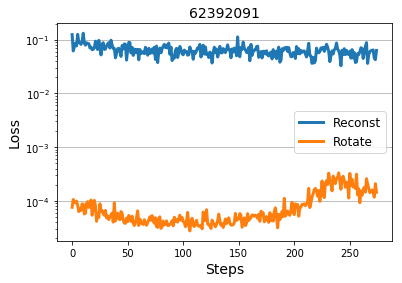

In [88]:
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

-------------------
62392094  both loss sgd 0.01, lambda 0.1

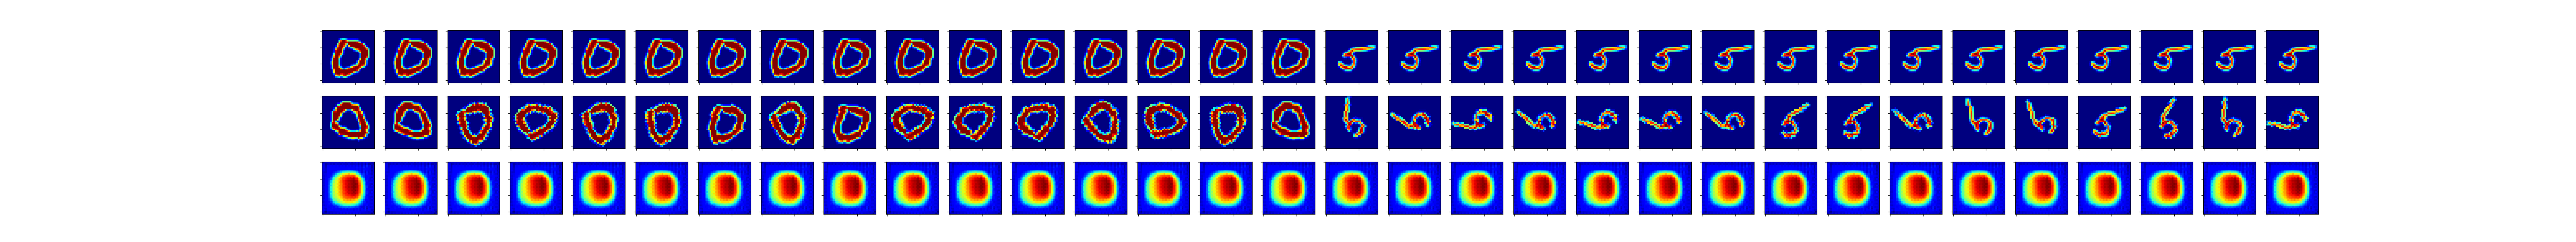

In [112]:
expname = '62392094'
display_png(Image(glob.glob('./fig/*'+expname+'*.png')[0]))

In [90]:
logname=os.path.basename(glob.glob('./log/*'+expname+'*.txt')[0])
loss_array = get_loss(logname, c_lambda=0.1)

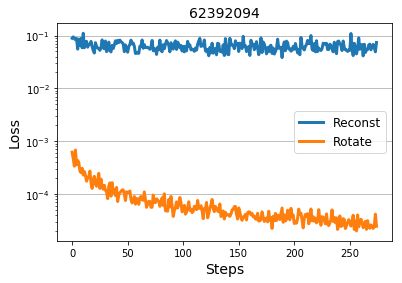

In [91]:
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

In [113]:
# directory
model_dir = "./output_model/"+expname
encoder = load_model(model_dir, epoch=0, mtype='encoder')

 Load encoder at 0 epoch


In [114]:
encs = encoder.predict(test_imgs)
encs_mean = encs.mean(axis=(1,2))
embedded_features = TSNE(n_components=2, perplexity=30.0).fit_transform(encs_mean)

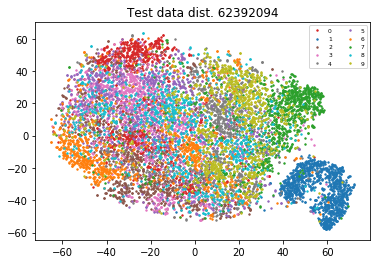

In [116]:
fig = plt.figure()
for i in range(10):
    idx = np.argwhere(y_test == i)
    plt.scatter(embedded_features[idx, 0], embedded_features[idx,1], color=colors[i], label=str(i), s=2)
plt.legend(ncol=2,prop={'size': 6})
plt.title('Test data dist. {}'.format(expname))
plt.show()

-------------------
62392180 both loss sgd 0.01 lambda 0.05

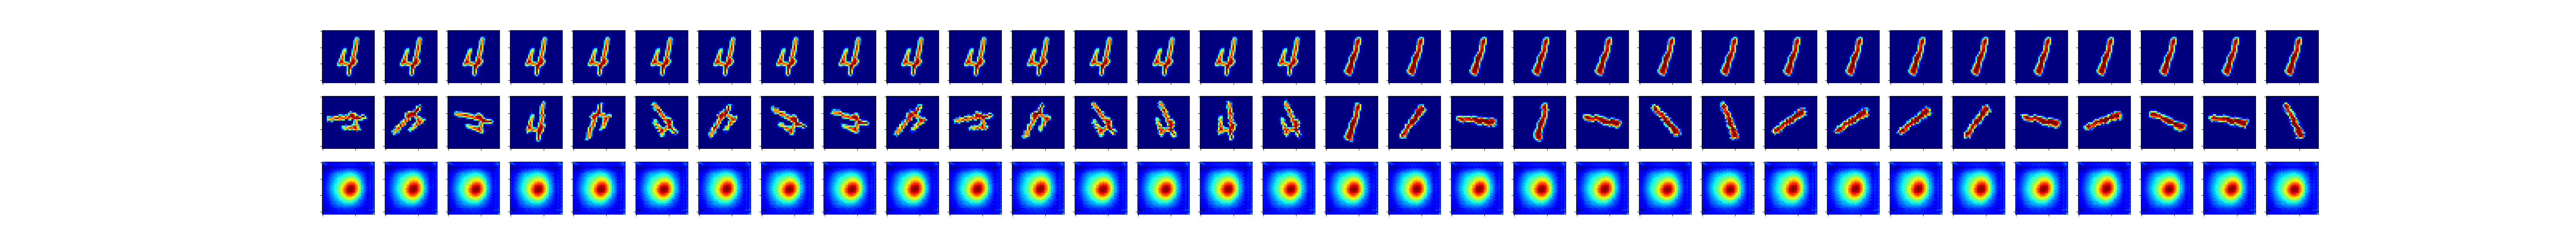

In [121]:
expname = '62392180'
display_png(Image(glob.glob('./fig/*'+expname+'*.png')[0]))

In [93]:
logname=os.path.basename(glob.glob('./log/*'+expname+'*.txt')[0])
loss_array = get_loss(logname, c_lambda=0.05)

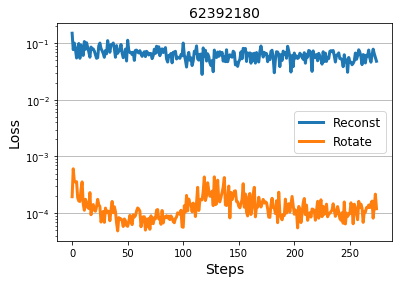

In [94]:
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

In [122]:
# directory
model_dir = "./output_model/"+expname
encoder = load_model(model_dir, epoch=0, mtype='encoder')

 Load encoder at 0 epoch


In [123]:
encs = encoder.predict(test_imgs)
encs_mean = encs.mean(axis=(1,2))
embedded_features = TSNE(n_components=2, perplexity=30.0).fit_transform(encs_mean)

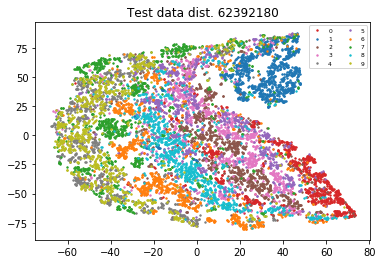

In [124]:
fig = plt.figure()
for i in range(10):
    idx = np.argwhere(y_test == i)
    plt.scatter(embedded_features[idx, 0], embedded_features[idx,1], color=colors[i], label=str(i), s=2)
plt.legend(ncol=2,prop={'size': 6})
plt.title('Test data dist. {}'.format(expname))
plt.show()

---------------------
62392252 both loss sgd 0.01 lmbda 0.01 

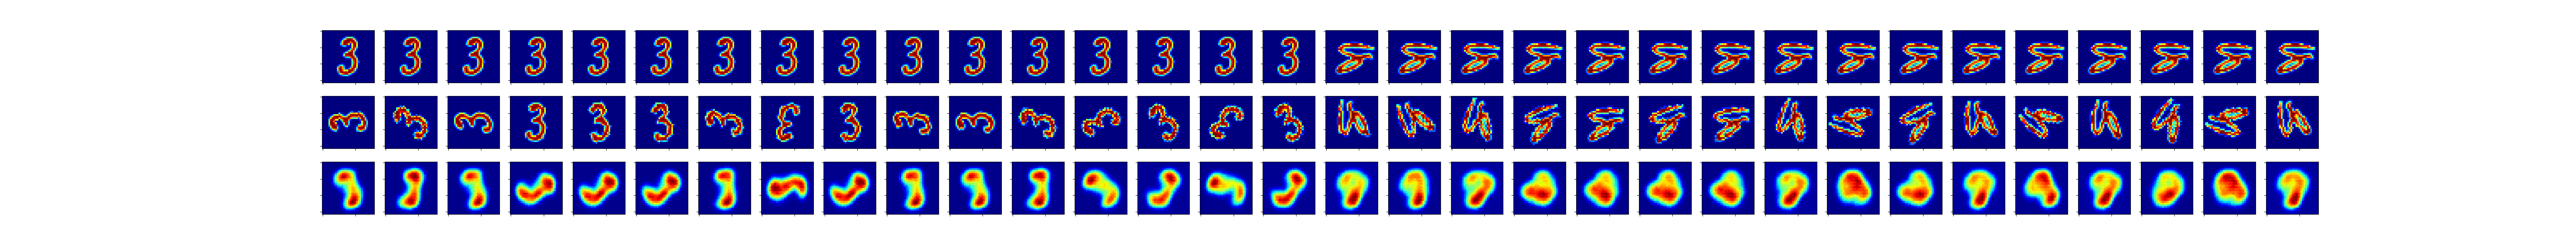

In [95]:
expname = '62392252'
display_png(Image(glob.glob('./fig/*'+expname+'*.png')[0]))

In [96]:
logname=os.path.basename(glob.glob('./log/*'+expname+'*.txt')[0])
loss_array = get_loss(logname, c_lambda=0.01)

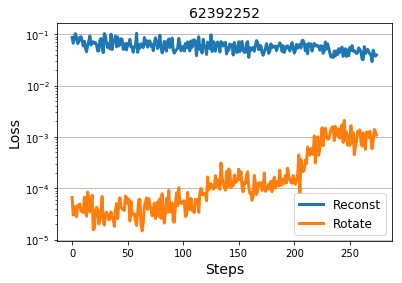

In [97]:
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

---------------------
 62392273 both loss sgd 0.005 lmbda 0.01

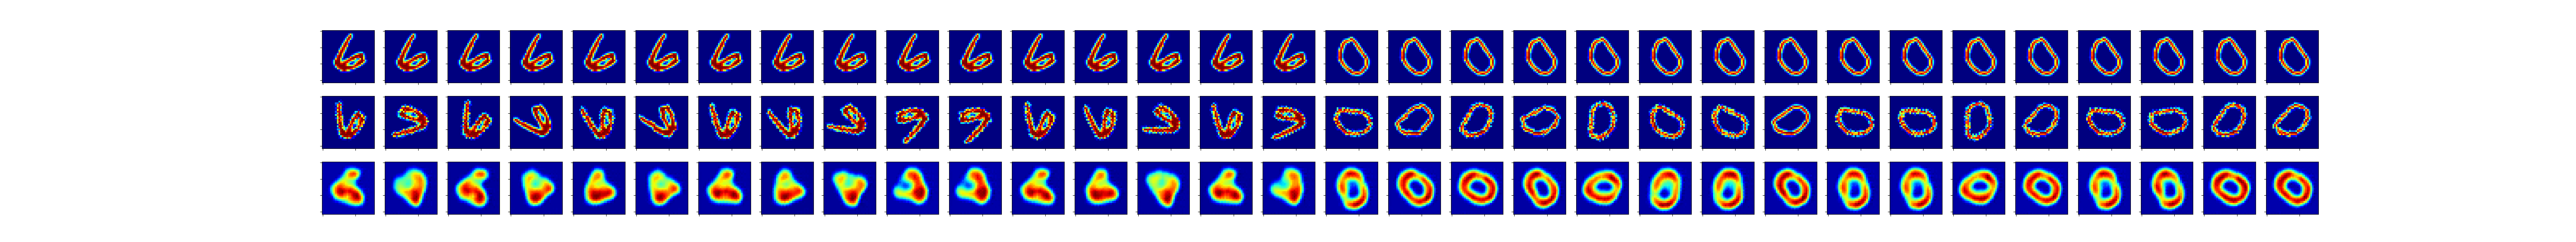

In [117]:
expname = '62392273'
display_png(Image(glob.glob('./fig/*'+expname+'*.png')[0]))

In [99]:
logname=os.path.basename(glob.glob('./log/*'+expname+'*.txt')[0])
loss_array = get_loss(logname, c_lambda=0.005)

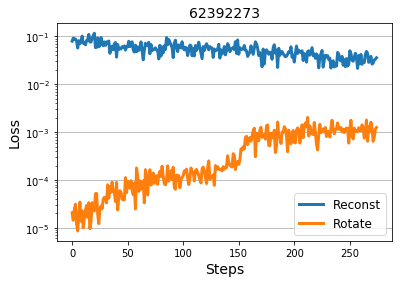

In [100]:
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

In [118]:
# directory
model_dir = "./output_model/"+expname
encoder = load_model(model_dir, epoch=0, mtype='encoder')

 Load encoder at 0 epoch


In [119]:
encs = encoder.predict(test_imgs)
encs_mean = encs.mean(axis=(1,2))
embedded_features = TSNE(n_components=2, perplexity=30.0).fit_transform(encs_mean)

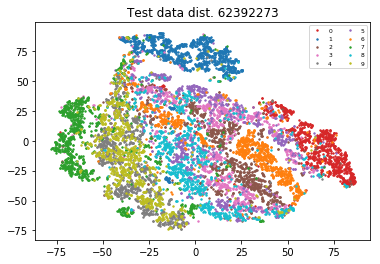

In [120]:
fig = plt.figure()
for i in range(10):
    idx = np.argwhere(y_test == i)
    plt.scatter(embedded_features[idx, 0], embedded_features[idx,1], color=colors[i], label=str(i), s=2)
plt.legend(ncol=2,prop={'size': 6})
plt.title('Test data dist. {}'.format(expname))
plt.show()

------------------
62394325 : both loss epoch 4 sgd 0.01 lambda 0.05

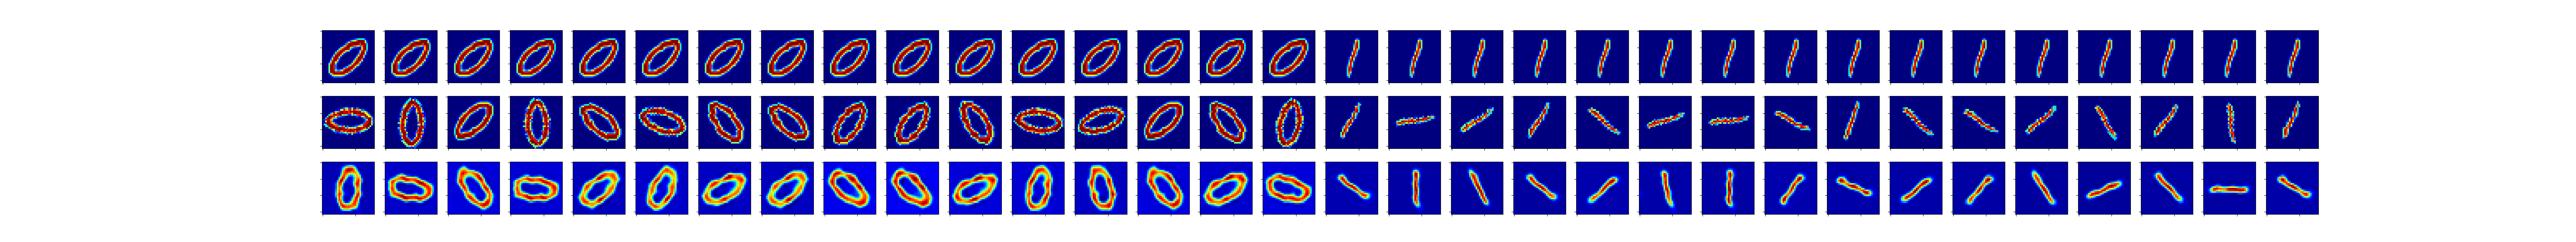

In [229]:
expname = '62394325'
display_png(Image(glob.glob('./fig/*'+expname+'*.png')[0]))

In [230]:
logname=os.path.basename(glob.glob('./log/*'+expname+'*.txt')[0])
loss_array = get_loss(logname, c_lambda=0.05)

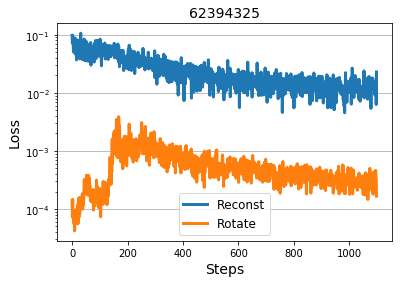

In [231]:
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

In [233]:
# directory
model_dir = "./output_model/"+expname
encoder = load_model(model_dir, epoch=3, mtype='encoder')

 Load encoder at 3 epoch


In [234]:
encs = encoder.predict(test_imgs)
encs_mean = encs.mean(axis=(1,2))
embedded_features = TSNE(n_components=2, perplexity=30.0).fit_transform(encs_mean)

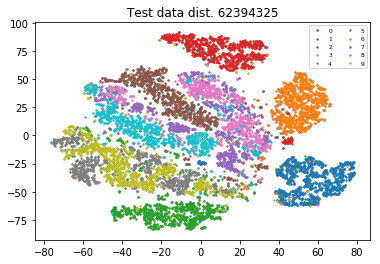

In [235]:
fig = plt.figure()
for i in range(10):
    idx = np.argwhere(y_test == i)
    plt.scatter(embedded_features[idx, 0], embedded_features[idx,1], color=colors[i], label=str(i), s=2)
plt.legend(ncol=2,prop={'size': 6})
plt.title('Test data dist. {}'.format(expname))
plt.show()

-----------------------------
62392650: both loss epoch 4 sgd 0.01 lambda 0.075

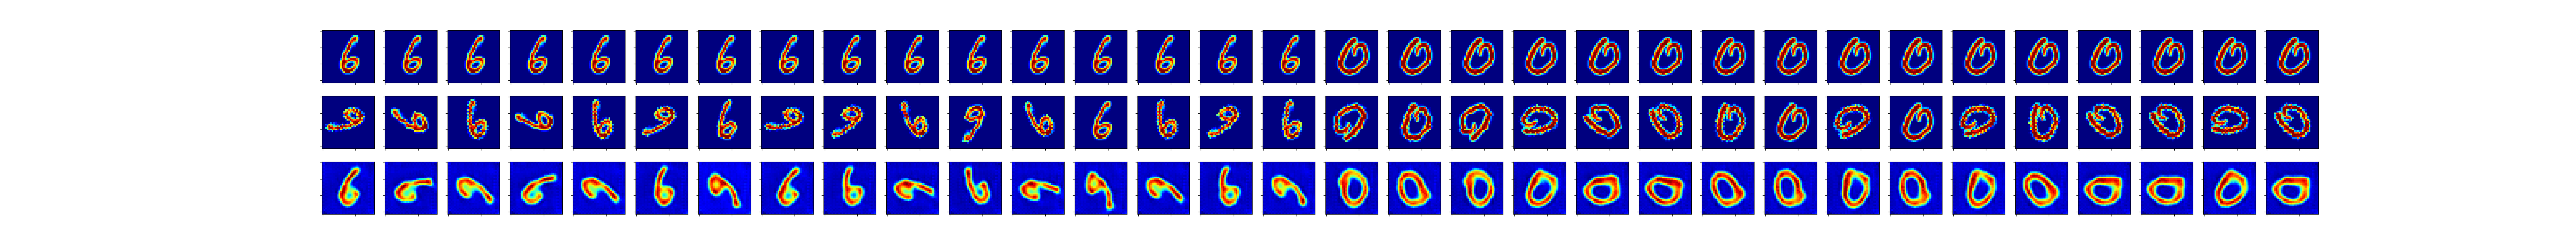

In [143]:
expname = '62392650'
display_png(Image(glob.glob('./fig/*'+expname+'*.png')[0]))

In [144]:
logname=os.path.basename(glob.glob('./log/*'+expname+'*.txt')[0])
loss_array = get_loss(logname, c_lambda=0.075)

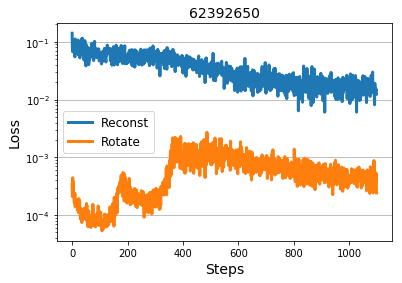

In [145]:
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

In [146]:
# directory
model_dir = "./output_model/"+expname
encoder = load_model(model_dir, epoch=3, mtype='encoder')

 Load encoder at 3 epoch


In [147]:
encs = encoder.predict(test_imgs)
encs_mean = encs.mean(axis=(1,2))
embedded_features = TSNE(n_components=2, perplexity=30.0).fit_transform(encs_mean)

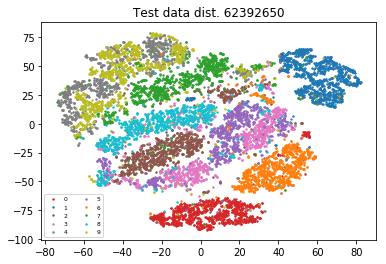

In [148]:
fig = plt.figure()
for i in range(10):
    idx = np.argwhere(y_test == i)
    plt.scatter(embedded_features[idx, 0], embedded_features[idx,1], color=colors[i], label=str(i), s=2)
plt.legend(ncol=2,prop={'size': 6})
plt.title('Test data dist. {}'.format(expname))
plt.show()

------------------------
62392493: both loss epoch 4 sgd 0.01 lambda 0.1

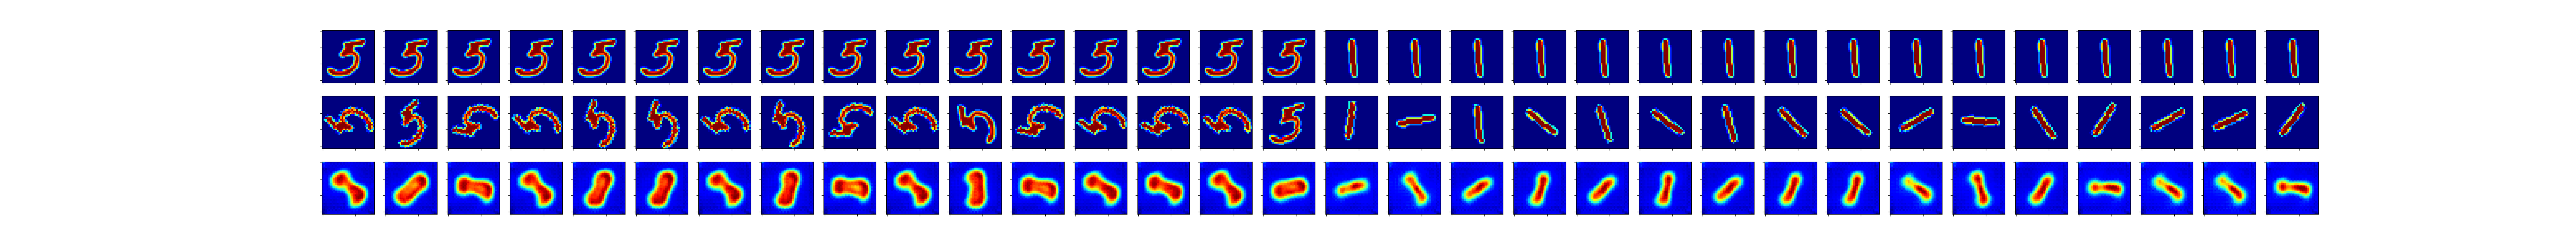

In [149]:
expname = '62392493'
display_png(Image(glob.glob('./fig/*'+expname+'*.png')[0]))

In [150]:
logname=os.path.basename(glob.glob('./log/*'+expname+'*.txt')[0])
loss_array = get_loss(logname, c_lambda=0.1)

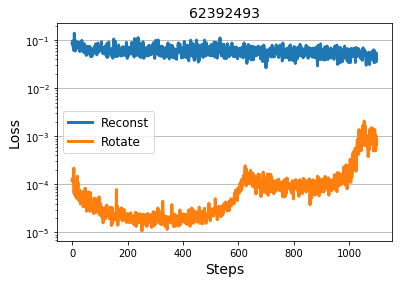

In [151]:
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

In [152]:
# directory
model_dir = "./output_model/"+expname
encoder = load_model(model_dir, epoch=3, mtype='encoder')

 Load encoder at 3 epoch


In [153]:
encs = encoder.predict(test_imgs)
encs_mean = encs.mean(axis=(1,2))
embedded_features = TSNE(n_components=2, perplexity=30.0).fit_transform(encs_mean)

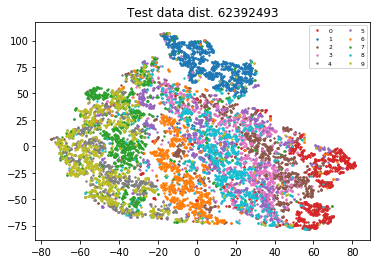

In [154]:
fig = plt.figure()
for i in range(10):
    idx = np.argwhere(y_test == i)
    plt.scatter(embedded_features[idx, 0], embedded_features[idx,1], color=colors[i], label=str(i), s=2)
plt.legend(ncol=2,prop={'size': 6})
plt.title('Test data dist. {}'.format(expname))
plt.show()

-------------------------------------
62401806 lambda 10.0

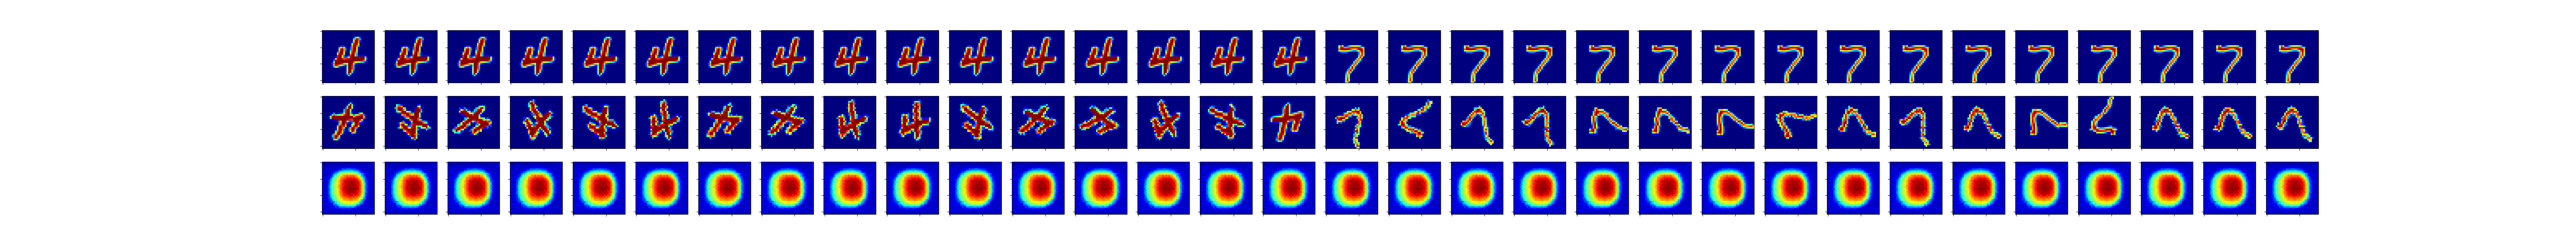

In [14]:
expname = '62401806'
display_png(Image(glob.glob('./fig/*'+expname+'*.png')[0]))

In [15]:
logname=os.path.basename(glob.glob('./log/*'+expname+'*.txt')[0])
loss_array = get_loss(logname, c_lambda=10.0)

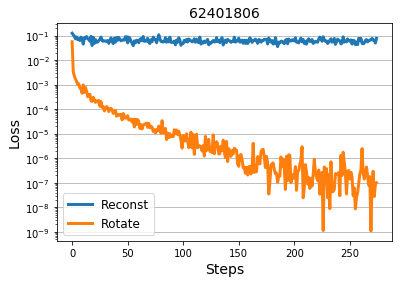

In [16]:
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

-----------------------
62401805 lambda 100

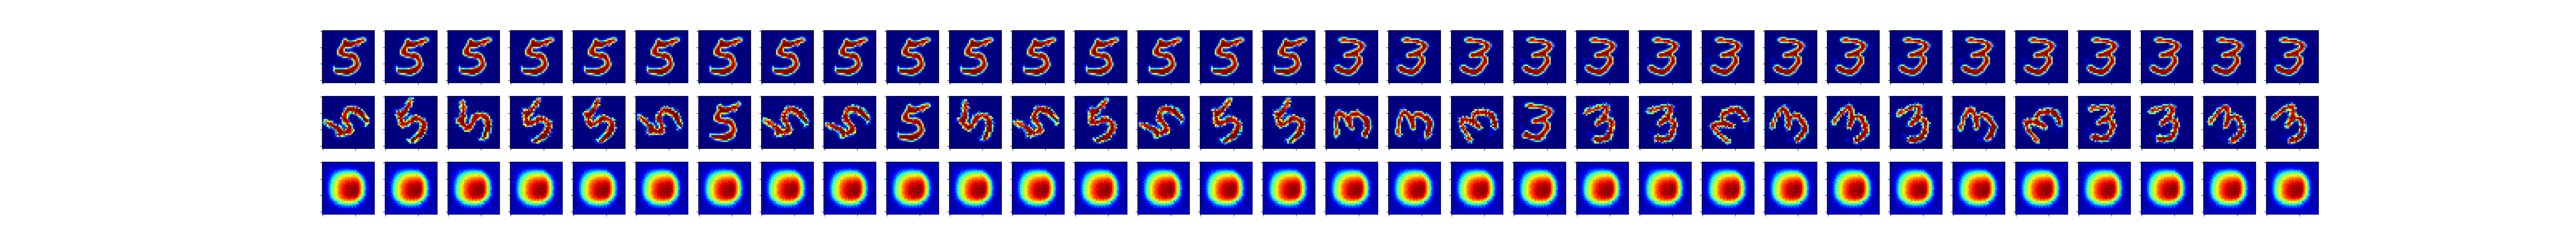

In [17]:
expname = '62401805'
display_png(Image(glob.glob('./fig/*'+expname+'*.png')[0]))

In [18]:
logname=os.path.basename(glob.glob('./log/*'+expname+'*.txt')[0])
loss_array = get_loss(logname, c_lambda=100.0)

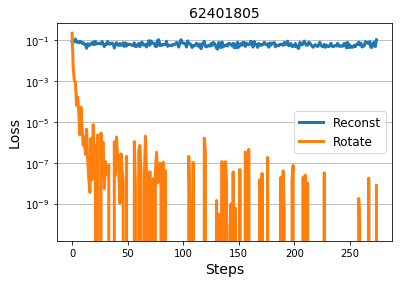

In [19]:
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

------------------
#### Angle only 0-30 degree
62393286 both loss sgd 0.01 lambda 1.0

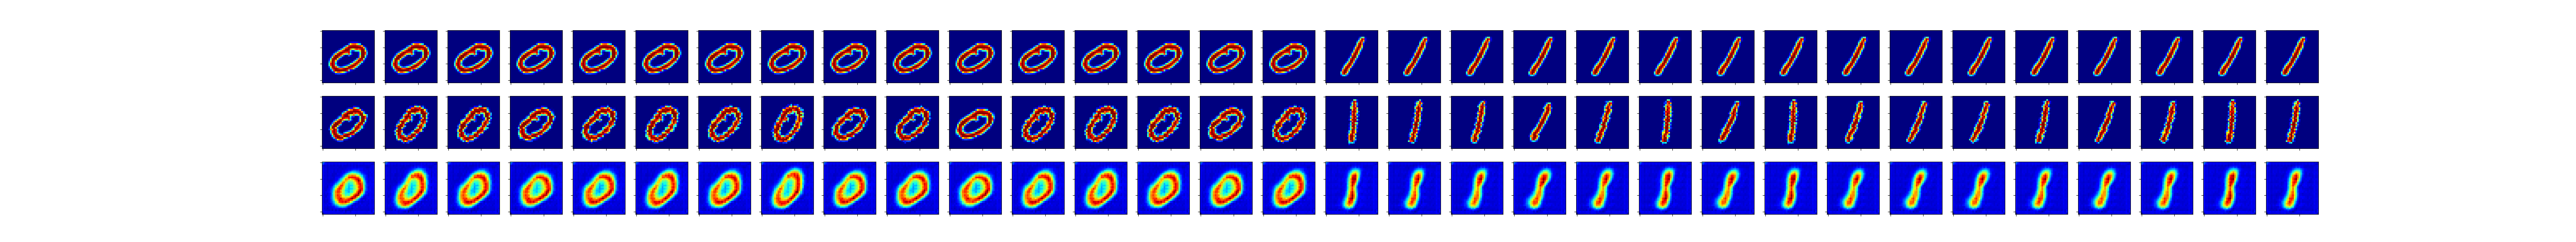

In [161]:
expname = '62393286'
display_png(Image(glob.glob('./fig/*'+expname+'*.png')[0]))

In [162]:
logname=os.path.basename(glob.glob('./log/*'+expname+'*.txt')[0])
loss_array = get_loss(logname, c_lambda=0.1)

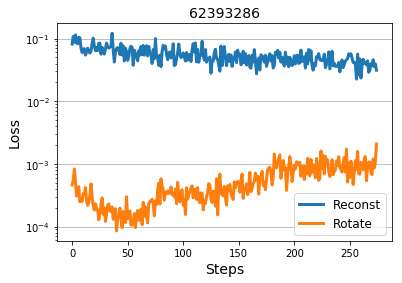

In [163]:
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

In [166]:
# directory
model_dir = "./output_model/"+expname
encoder = load_model(model_dir, epoch=0, mtype='encoder')

 Load encoder at 0 epoch


In [167]:
encs = encoder.predict(test_imgs)
encs_mean = encs.mean(axis=(1,2))
embedded_features = TSNE(n_components=2, perplexity=30.0).fit_transform(encs_mean)

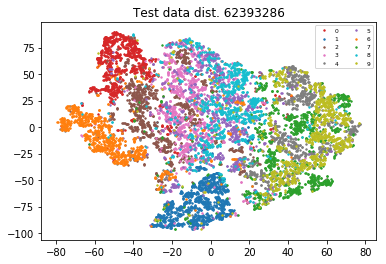

In [168]:
fig = plt.figure()
for i in range(10):
    idx = np.argwhere(y_test == i)
    plt.scatter(embedded_features[idx, 0], embedded_features[idx,1], color=colors[i], label=str(i), s=2)
plt.legend(ncol=2,prop={'size': 6})
plt.title('Test data dist. {}'.format(expname))
plt.show()

-------------------------------------
### Figs for Professors (9/9)

- Trained sucessfully: 62392650: both loss epoch 4 sgd 0.01 lambda 0.075

In [225]:
expname= "62392650"

In [226]:
logname=os.path.basename(glob.glob('./log/*'+expname+'*.txt')[0])
loss_array = get_loss(logname, c_lambda=0.075)

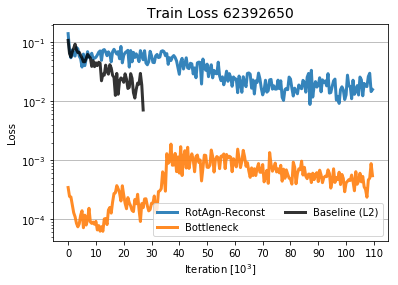

In [228]:
x = [i for i in range(len(baseline_loss))]
plt.figure()
#
label_list = [
    'RotAgn-Reconst',
    'Bottleneck'
]
x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x[[i for i in range(0,np.max(x),5)]],
             loss_array[[i for i in range(0,np.max(x),5)],i],
             label=label_list[i], linewidth=3, alpha=0.9)
    spl = make_interp_spline(x, loss_array[:,i], k=5) #BSpline object
    #xnew = np.linspace(np.min(x),np.max(x),40)
    #power_smooth = spl(xnew)
    #plt.plot(xnew, power_smooth, linewidth=4)
_x = np.array([i for i in range(len(baseline_loss))])
plt.plot(_x[[i for i in range(0,np.max(_x),5)]],
         np.asarray(baseline_loss)[[ i for i in range(0,np.max(_x),5)]],
         label='Baseline (L2)', linewidth=3, alpha=0.8, color='black')
#spl = make_interp_spline(_x, baseline_loss, k=5) #BSpline object
#xnew = np.linspace(np.min(_x),np.max(x),40)
#power_smooth = spl(xnew)

plt.title('Train Loss {}'.format(expname), fontsize=14)
plt.ylabel('Loss')
plt.xlabel('Iteration'+r' [$10^3$]')
plt.xticks( [i for i in range(0,np.max(x)+100,100)], 
           [str(int(i*0.1)) for i in range(0,np.max(x)+100,100)])
plt.legend(ncol=2)
plt.gca().yaxis.grid()
#plt.gca().xaxis.grid()
plt.yscale('log')
plt.show()

----------------
62392493 lambda 0.1 |  Trained Fail case whose lamba is close to the success case

In [218]:
expname='62392493'
logname=os.path.basename(glob.glob('./log/*'+expname+'*.txt')[0])
loss_array = get_loss(logname, c_lambda=0.1)

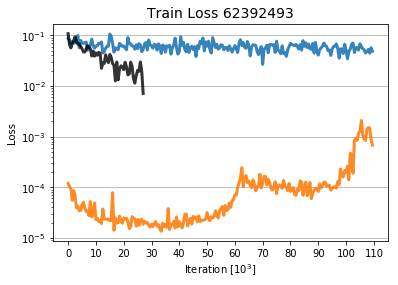

In [224]:
x = [i for i in range(len(baseline_loss))]
plt.figure()
#
label_list = [
    'RotAgn-Reconst',
    'Bottleneck'
]
x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x[[i for i in range(0,np.max(x),5)]],
             loss_array[[i for i in range(0,np.max(x),5)],i],
             label=label_list[i], linewidth=3, alpha=0.9)
    spl = make_interp_spline(x, loss_array[:,i], k=5) #BSpline object
    #xnew = np.linspace(np.min(x),np.max(x),40)
    #power_smooth = spl(xnew)
    #plt.plot(xnew, power_smooth, linewidth=4)
_x = np.array([i for i in range(len(baseline_loss))])
plt.plot(_x[[i for i in range(0,np.max(_x),5)]],
         np.asarray(baseline_loss)[[ i for i in range(0,np.max(_x),5)]],
         label='Baseline (L2)', linewidth=3, alpha=0.8, color='black')
#spl = make_interp_spline(_x, baseline_loss, k=5) #BSpline object
#xnew = np.linspace(np.min(_x),np.max(x),40)
#power_smooth = spl(xnew)

plt.title('Train Loss {}'.format(expname), fontsize=14)
plt.ylabel('Loss')
plt.xlabel('Iteration'+r' [$10^3$]')
plt.xticks( [i for i in range(0,np.max(x)+100,100)], 
           [str(int(i*0.1)) for i in range(0,np.max(x)+100,100)])
#plt.legend(ncol=2)
plt.gca().yaxis.grid()
#plt.gca().xaxis.grid()
plt.yscale('log')
plt.show()

------------
62394325 lambda 0.05 | Another success case below lambda = 0.075

In [236]:
expname='62394325'
logname=os.path.basename(glob.glob('./log/*'+expname+'*.txt')[0])
loss_array = get_loss(logname, c_lambda=0.05)

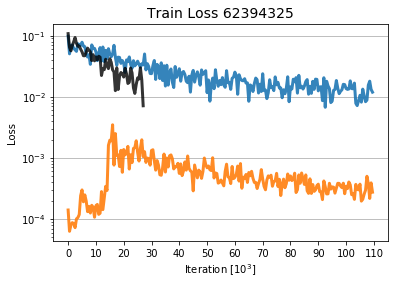

In [237]:
x = [i for i in range(len(baseline_loss))]
plt.figure()
#
label_list = [
    'RotAgn-Reconst',
    'Bottleneck'
]
x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x[[i for i in range(0,np.max(x),5)]],
             loss_array[[i for i in range(0,np.max(x),5)],i],
             label=label_list[i], linewidth=3, alpha=0.9)
    spl = make_interp_spline(x, loss_array[:,i], k=5) #BSpline object
    #xnew = np.linspace(np.min(x),np.max(x),40)
    #power_smooth = spl(xnew)
    #plt.plot(xnew, power_smooth, linewidth=4)
_x = np.array([i for i in range(len(baseline_loss))])
plt.plot(_x[[i for i in range(0,np.max(_x),5)]],
         np.asarray(baseline_loss)[[ i for i in range(0,np.max(_x),5)]],
         label='Baseline (L2)', linewidth=3, alpha=0.8, color='black')
#spl = make_interp_spline(_x, baseline_loss, k=5) #BSpline object
#xnew = np.linspace(np.min(_x),np.max(x),40)
#power_smooth = spl(xnew)

plt.title('Train Loss {}'.format(expname), fontsize=14)
plt.ylabel('Loss')
plt.xlabel('Iteration'+r' [$10^3$]')
plt.xticks( [i for i in range(0,np.max(x)+100,100)], 
           [str(int(i*0.1)) for i in range(0,np.max(x)+100,100)])
#plt.legend(ncol=2)
plt.gca().yaxis.grid()
#plt.gca().xaxis.grid()
plt.yscale('log')
plt.show()

------------------------
#### Get images

In [249]:
_imgs_list = []
for i in range(10):
    idx = np.argwhere(y_test==i)[0]
    _imgs_list.append(test_imgs[idx])
imgs_np = np.squeeze(np.asarray(_imgs_list)).reshape(-1,32,32,1)

In [250]:
imgs_np.shape

(10, 32, 32, 1)

In [27]:
def rotate_fn(images, seed=0, return_np=False):
    """
    Apply random rotation to data and parse to dataset module
    images: before parse to encoder

    * copy function from classifier.py
    """

    # random rotation
    random_angles = tf.random.uniform(
        shape = (tf.shape(images)[0], ), 
        minval = 0*math.pi/180,
        maxval = 180.00*math.pi/180,
        dtype=tf.float32,
        seed = seed
    )
        #maxval = 359.999*math.pi/180,
    rotated_tensor_images = tf.contrib.image.transform(
      images,
      tf.contrib.image.angles_to_projective_transforms(
        random_angles, tf.cast(tf.shape(images)[1], tf.float32), 
            tf.cast(tf.shape(images)[2], tf.float32)
        )
    )
    return rotated_tensor_images

In [263]:
rimgs_np = tf.keras.backend.eval(rotate_fn(imgs_np, seed=12121))

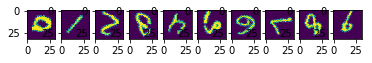

In [264]:
plt.figure()
for i in range(10):
    ax = plt.subplot(1,10, i+1)
    plt.imshow(rimgs_np[i].reshape(32,32))
plt.show()

62392650

In [256]:
# directory
model_dir = "./output_model/62392650"
# model
encoder = load_model(model_dir, epoch=3, mtype='encoder')
decoder = load_model(model_dir, epoch=3, mtype='decoder')

 Load encoder at 3 epoch
 Load decoder at 3 epoch


In [265]:
encoded_imgs = encoder.predict(rimgs_np)
decoded_imgs = decoder.predict(encoded_imgs)

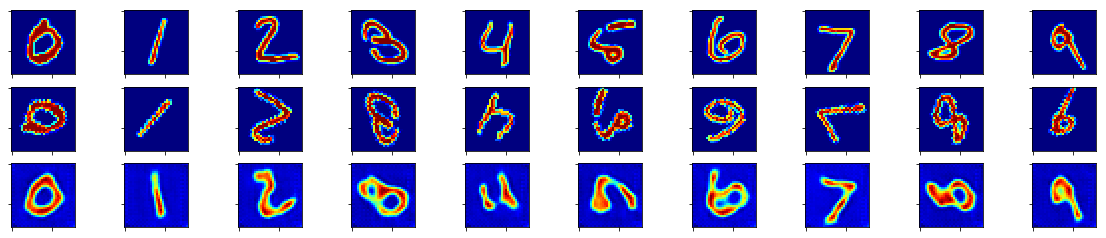

In [266]:
f,a=plt.subplots(3,10,figsize=(20,4))
for i in range(10):
    a[0][i].imshow(np.reshape(imgs_np[i],(32,32)), cmap='jet')
    a[1][i].imshow(np.reshape(rimgs_np[i],(32,32)), cmap='jet')
    a[2][i].imshow(np.reshape(decoded_imgs[i],(32,32)), cmap='jet')
    #
    for j in range(3):
        a[j][i].set_xticklabels([])
        a[j][i].set_yticklabels([])
    #a[1][i].set_xticklabels([])
    #a[1][i].set_yticklabels([])
plt.show()

-------------
62394325

In [267]:
# directory
model_dir = "./output_model/62394325"
# model
encoder = load_model(model_dir, epoch=3, mtype='encoder')
decoder = load_model(model_dir, epoch=3, mtype='decoder')

 Load encoder at 3 epoch
 Load decoder at 3 epoch


In [268]:
encoded_imgs = encoder.predict(rimgs_np)
decoded_imgs = decoder.predict(encoded_imgs)

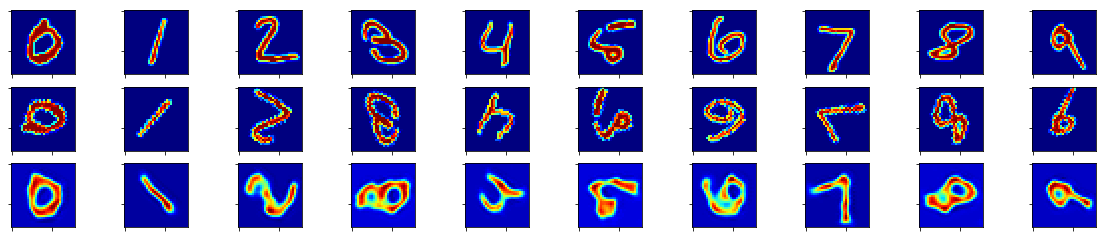

In [269]:
f,a=plt.subplots(3,10,figsize=(20,4))
for i in range(10):
    a[0][i].imshow(np.reshape(imgs_np[i],(32,32)), cmap='jet')
    a[1][i].imshow(np.reshape(rimgs_np[i],(32,32)), cmap='jet')
    a[2][i].imshow(np.reshape(decoded_imgs[i],(32,32)), cmap='jet')
    #
    for j in range(3):
        a[j][i].set_xticklabels([])
        a[j][i].set_yticklabels([])
plt.show()

-------------------------------
## 09/10 Debugging

- System change for debugging
 - Angles = {0, 120, 240}
 - Compute theta and chi(theta for sencond term) on every sample. 

-----------------------
### 62406419 lambda 1.0

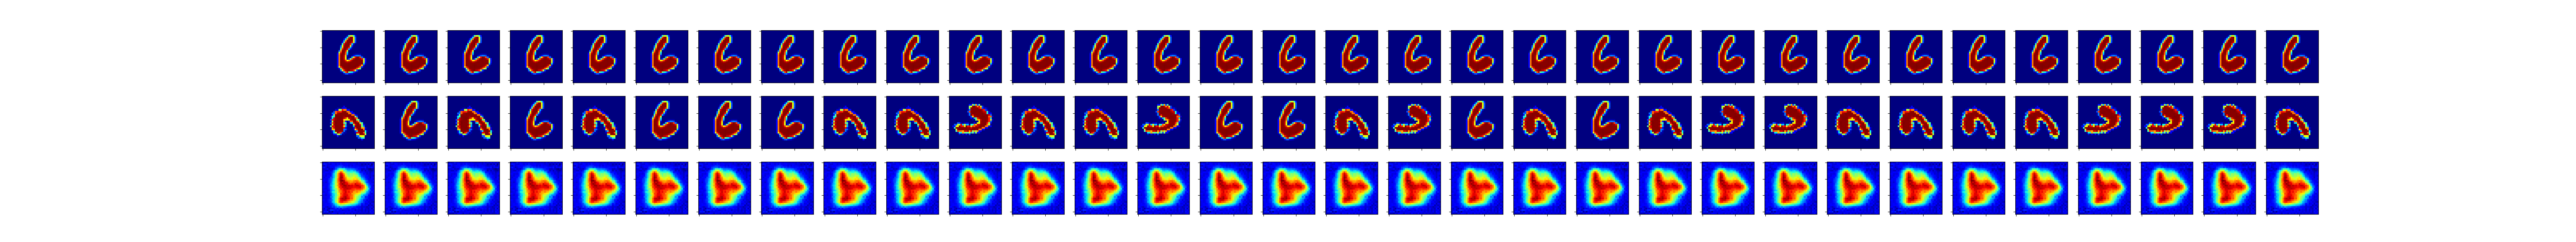

In [42]:
expname = '62406419'
display_png(Image(glob.glob('./fig/*'+expname+'*.png')[0]))

In [43]:
logname=os.path.basename(glob.glob('./log/*'+expname+'*.txt')[0])
loss_array = get_loss(logname, c_lambda=1.0)

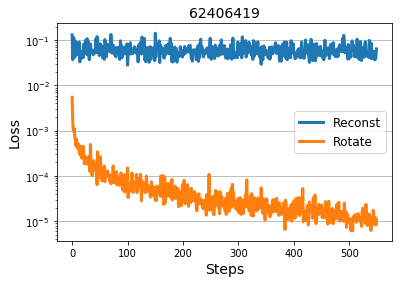

In [44]:
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

#### Check Z for different rotation.

In [45]:
def load_iter_model(model_dir, epoch, iteration, mtype):
    print(" Load {} at {} epoch {} iteration".format(mtype, epoch, iteration))
    model_def = model_dir+'/'+mtype+'.json'
    model_weight = model_dir+'/'+mtype+'-'+str(epoch)+'-iter'+str(iteration)+'.h5'
    with open(model_def, "r") as f:
        model = tf.keras.models.model_from_json(f.read())
    model.load_weights(model_weight)
    return model

In [47]:
# directory
model_dir = "./output_model/"+str(expname)
# model
encoder = load_model(model_dir,epoch=0,mtype='encoder')
decoder = load_model(model_dir,epoch=0,mtype='decoder')

 Load encoder at 0 epoch
 Load decoder at 0 epoch


In [48]:
oimgs_np = test_imgs[100].reshape(1,32,32,1)
imgs_np = np.concatenate(
            np.asarray([oimgs_np.copy() for i in range(10)]), axis=0
        )
print('imgs_np shape {}'.format(imgs_np.shape))
rimgs_np = tf.keras.backend.eval(rotate_fn(imgs_np, seed=12121))

imgs_np shape (10, 32, 32, 1)


In [49]:
encoded_imgs = encoder.predict(rimgs_np)
decoded_imgs = decoder.predict(encoded_imgs)

In [50]:
encoded_imgs.shape

(10, 2, 2, 128)

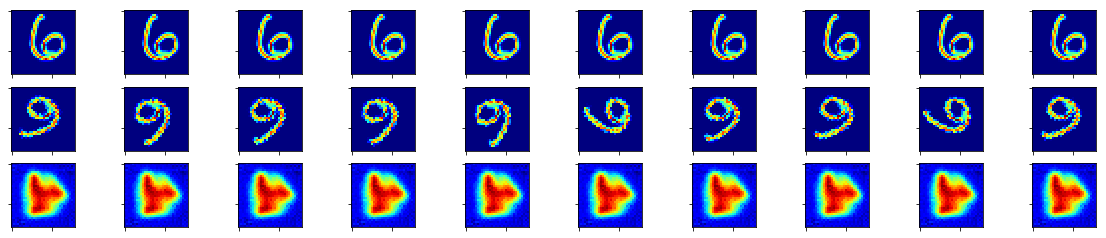

In [51]:
f,a=plt.subplots(3,10,figsize=(20,4))
for i in range(10):
    a[0][i].imshow(np.reshape(imgs_np[0],(32,32)), cmap='jet')
    a[1][i].imshow(np.reshape(rimgs_np[i],(32,32)), cmap='jet')
    a[2][i].imshow(np.reshape(decoded_imgs[i],(32,32)), cmap='jet')
    #
    for j in range(3):
        a[j][i].set_xticklabels([])
        a[j][i].set_yticklabels([])
plt.show()

----------------------
### 62407110 lambda 0.05 

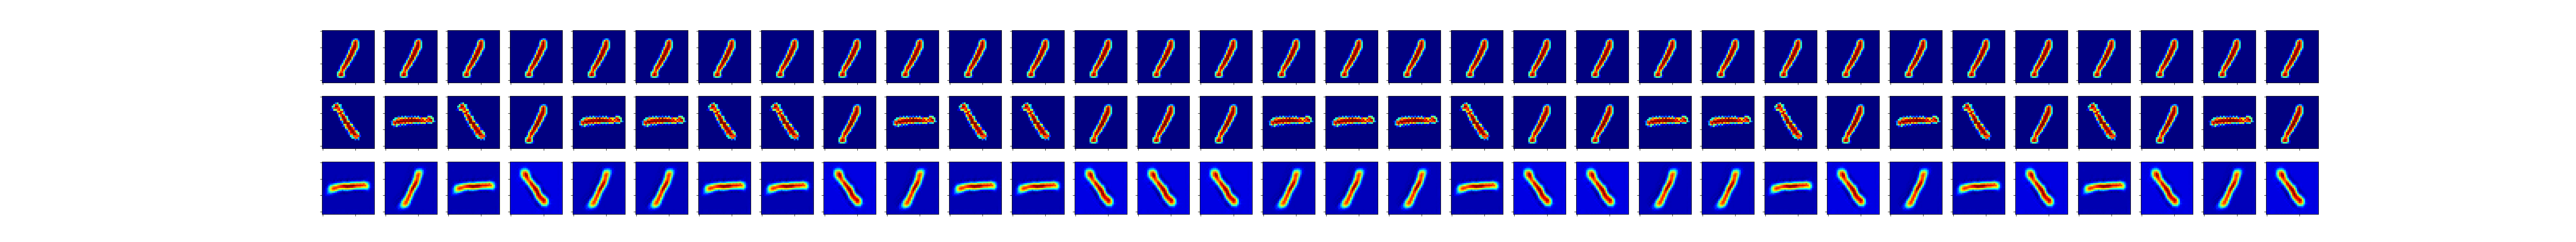

In [69]:
expname = '62407110'
display_png(Image(glob.glob('./fig/*'+expname+'*.png')[0]))

Comment: In 0.05, bottleneck loss doesn't work so that reconstructed images don't have same orientaion 

In [70]:
logname=os.path.basename(glob.glob('./log/*'+expname+'*.txt')[0])
loss_array = get_loss(logname, c_lambda=0.05)

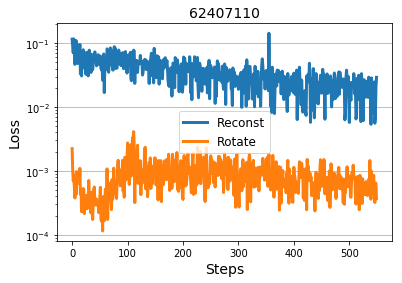

In [71]:
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

In [72]:
# directory
model_dir = "./output_model/"+str(expname)
# model
encoder = load_model(model_dir,epoch=0,mtype='encoder')
decoder = load_model(model_dir,epoch=0,mtype='decoder')

 Load encoder at 0 epoch
 Load decoder at 0 epoch


In [73]:
encoded_imgs = encoder.predict(rimgs_np)
decoded_imgs = decoder.predict(encoded_imgs)

theta = 118

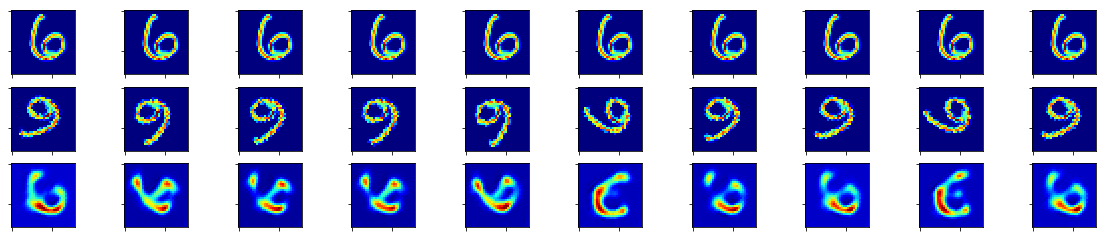

In [74]:
f,a=plt.subplots(3,10,figsize=(20,4))
for i in range(10):
    a[0][i].imshow(np.reshape(imgs_np[0],(32,32)), cmap='jet')
    a[1][i].imshow(np.reshape(rimgs_np[i],(32,32)), cmap='jet')
    a[2][i].imshow(np.reshape(decoded_imgs[i],(32,32)), cmap='jet')
    #
    for j in range(3):
        a[j][i].set_xticklabels([])
        a[j][i].set_yticklabels([])
plt.show()

Check if theta degree rotate or not

In [87]:
def rot_ind(images, angle_np=0):
    angle = tf.constant([angle_np*math.pi/180 for i in range(10)], dtype=tf.float32)
    rotated_tensor_images = tf.contrib.image.transform(
      images,
      tf.contrib.image.angles_to_projective_transforms(
        angle, tf.cast(tf.shape(images)[1], tf.float32), 
            tf.cast(tf.shape(images)[2], tf.float32)
        )
    )
    return rotated_tensor_images

In [99]:
360-118

242

In [95]:
rimgs_tensor = rot_ind(rimgs_np, -118) 

In [96]:
a = tf.keras.backend.eval(rimgs_tensor)

In [97]:
a.shape

(10, 32, 32, 1)

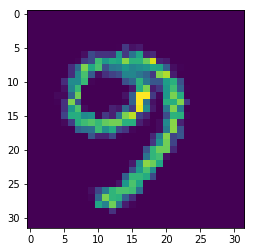

In [93]:
plt.imshow(rimgs_np[1].reshape(32,32))

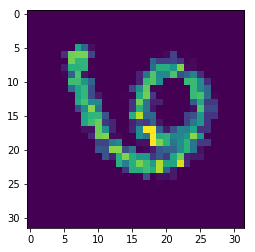

In [98]:
plt.imshow(a[1].reshape(32,32))

parctice for debugging

In [66]:
def _fn(batch_size):
    n = 0
    angles = []
    while n < batch_size:
      for i in [0, 120, 240]:
        angles.append(i)
        n = len(angles)
        if n == batch_size:
            break
    angles_np = np.array(angles)
    np.random.shuffle(angles_np)

    random_angles =  tf.constant(
      math.pi/180*angles_np,
      dtype=tf.float32
    )

    return random_angles

In [68]:
with tf.Session() as sess:
    a = _fn(32)
    print(a.eval())
    print(len(a.eval()))

[2.0943952 0.        4.1887903 2.0943952 0.        4.1887903 0.
 2.0943952 4.1887903 0.        2.0943952 4.1887903 2.0943952 0.
 4.1887903 2.0943952 4.1887903 4.1887903 0.        2.0943952 4.1887903
 2.0943952 0.        2.0943952 0.        0.        4.1887903 2.0943952
 0.        4.1887903 2.0943952 0.       ]
32


### 62407465

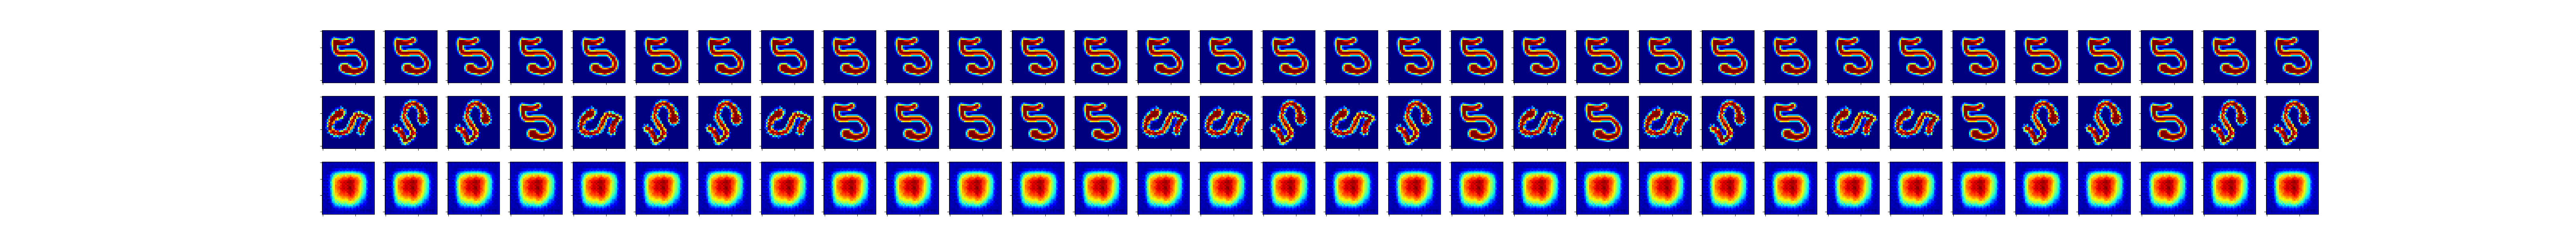

In [100]:
expname = '62407465'
display_png(Image(glob.glob('./fig/*'+expname+'*.png')[0]))

In [101]:
logname=os.path.basename(glob.glob('./log/*'+expname+'*.txt')[0])
loss_array = get_loss(logname, c_lambda=1.0)

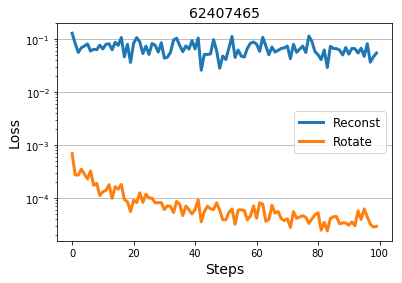

In [102]:
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

-----------------------------
## 09/11 Debug: Train model with only digit "5"

In [121]:
def get_angle(fname):
    return get_loss(fname, c_lambda=1.0)

### 62411377

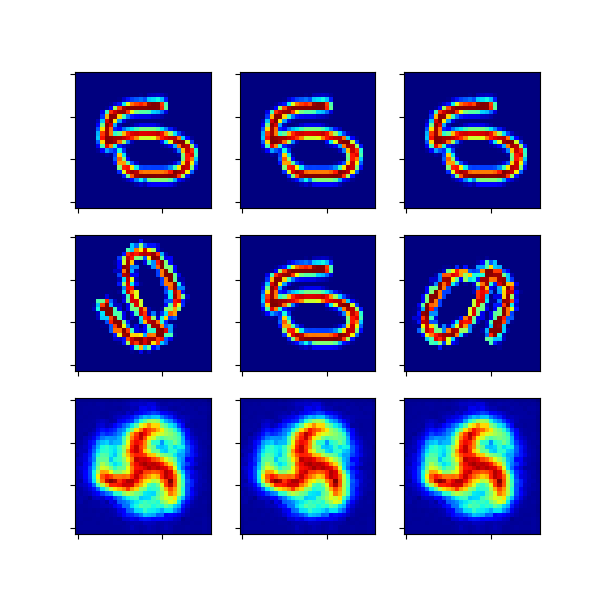

In [113]:
expname = '62411377'
display_png(Image(glob.glob('./fig/fig_62411377_nepoch-10*.png')[0]))

In [118]:
logname=os.path.basename(glob.glob('./log/loss_62411377_nepoch-10*.txt')[0])
loss_array = get_loss(logname, c_lambda=1.0)

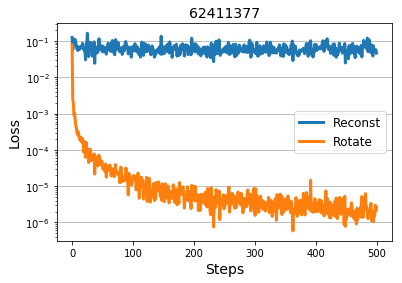

In [120]:
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

In [122]:
logname=os.path.basename(glob.glob('./log/degree_62411377_nepoch-10*.txt')[0])
degree_array = get_angle(logname)

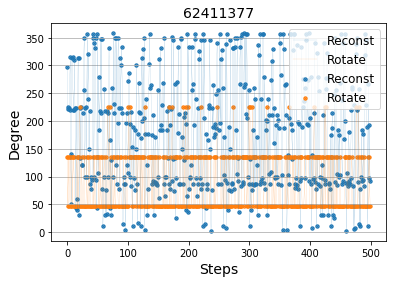

In [134]:
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.scatter(x, degree_array[:,i], label=label_list[i], linewidth=3, s=2)
    plt.plot(x, degree_array[:,i], label=label_list[i], linewidth=0.1)
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Degree', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

- Plot function for distribution of angles

In [ ]:
N = 20
radii = 10*np.random.rand(N)
width = np.pi/4*np.random.rand(N)
bars = ax.bar(theta, radii, width=width, bottom=0.0)
for r,bar in zip(radii, bars):
    bar.set_facecolor( cm.jet(r/10.))
    bar.set_alpha(0.5)

### 62412502 Only reconst-agn loss

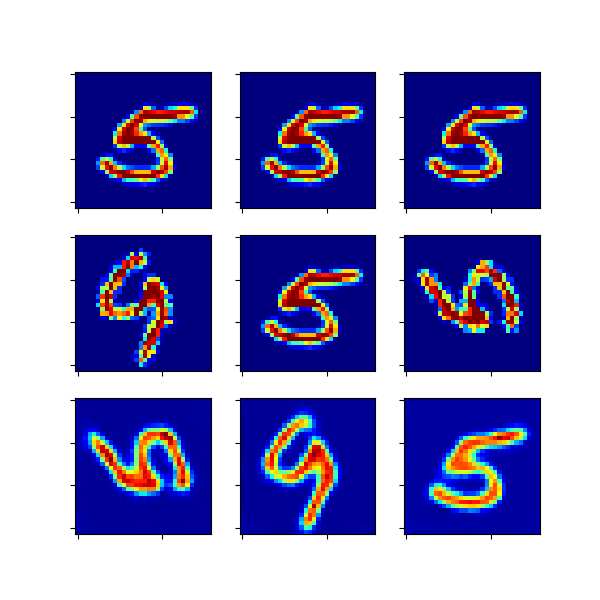

In [140]:
expname = '62412502'
display_png(Image(glob.glob('./fig/*'+expname+'*.png')[0]))

##### MEMO + Note

In [ ]:
Optimized degre = 120

If ONLY reconstruction-agnostic loss,  input images rotate 120 degree which is optimized degree in the training.

In [136]:
logname=os.path.basename(glob.glob('./log/loss_*62412502*.txt')[0])
loss_array = get_loss(logname, c_lambda=1.0)

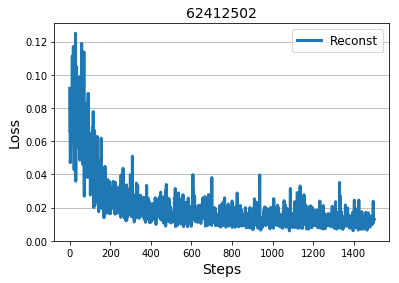

In [137]:
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(1):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
#plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

In [138]:
logname=os.path.basename(glob.glob('./log/degree_*'+expname+'*.txt')[0])
degree_array = get_angle(logname)

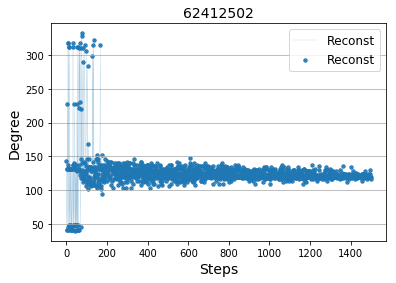

In [139]:
label_list = [
    'Reconst',
    'Rotate'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(1):
    plt.scatter(x, degree_array[:,i], label=label_list[i], linewidth=3, s=2)
    plt.plot(x, degree_array[:,i], label=label_list[i], linewidth=0.1)
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Degree', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

----------------
### 62413328 Only bottleneck loss

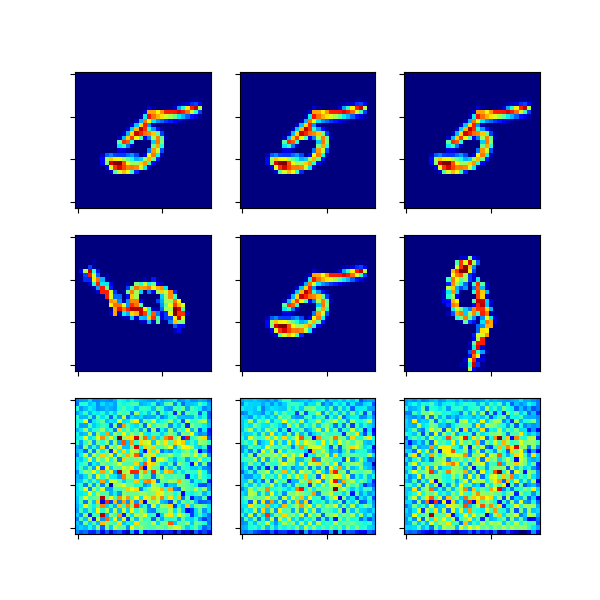

In [196]:
expname = '62413328'
display_png(Image(glob.glob('./fig/*'+expname+'*.png')[0]))

In [142]:
logname=os.path.basename(glob.glob('./log/loss_*'+expname+'*.txt')[0])
loss_array = get_loss(logname, c_lambda=1.0)

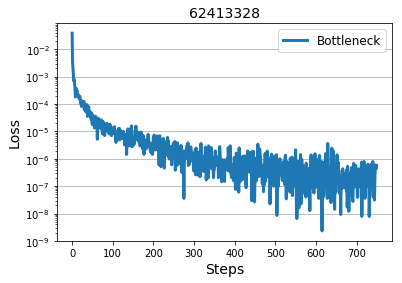

In [144]:
label_list = [
    'Reconst',
    'Bottleneck'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(1,2,1):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

In [145]:
logname=os.path.basename(glob.glob('./log/degree_*'+expname+'*.txt')[0])
degree_array = get_angle(logname)

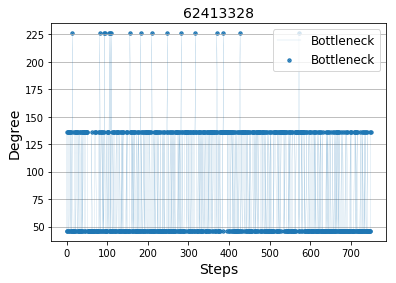

In [146]:
label_list = [
    'Reconst',
    'Bottleneck'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(1,2,1):
    plt.scatter(x, degree_array[:,i], label=label_list[i], linewidth=3, s=2)
    plt.plot(x, degree_array[:,i], label=label_list[i], linewidth=0.1)
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Degree', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

#### check bottleneck representation Z

In [231]:
# directory
expname = '62413328'
model_dir = "./output_model/"+expname
# model
encoder = load_model(model_dir, epoch=14, mtype='encoder')

 Load encoder at 14 epoch


set data 

In [ ]:
# process for data with resize
#imgs_tf = resize_fn(x_test)
#test_imgs = tf.keras.backend.eval(imgs_tf)

- Test 1: Compare z with one original image and the variation {0,120,240}

In [232]:
# get one image
idx = np.where(y_test == 5)[0][320]
#print(idx)
test_img = test_imgs[idx].reshape(1,32,32,1)
print(test_img.shape)

(1, 32, 32, 1)


In [233]:
def _rot_fn(images, angles):
    rotated_tensor_images = tf.contrib.image.transform(
      images,
      tf.contrib.image.angles_to_projective_transforms(
        angles, tf.cast(tf.shape(images)[1], tf.float32),
            tf.cast(tf.shape(images)[2], tf.float32)
        )
    )
    return rotated_tensor_images

In [234]:
angles = tf.constant(math.pi/180*np.array([0,120,240]), dtype=tf.float32)
ctest_imgs = np.concatenate([ test_img.copy() for i in range(3)], axis=0)
print("check shape {}".format(ctest_imgs.shape))
rtest_imgs = _rot_fn(ctest_imgs, angles)

check shape (3, 32, 32, 1)


check if images (for input of encoder) rotates 0, 120 and 240 degree  
*attention for angle argument. tf takes radian so conversion is necessary*

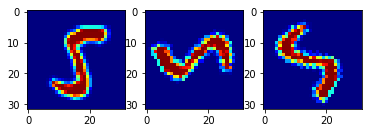

In [235]:
#rtest_imgs_np = tf.keras.backend.eval(rtest_imgs)
with tf.Session() as sess:
    rtest_imgs_np = rtest_imgs.eval()
    plt.figure()
    for i in range(3):
        ax = plt.subplot(1,3,i+1)
        plt.imshow(rtest_imgs_np[i].reshape(32,32), cmap='jet')
    plt.show()

Pass to encoder

In [236]:
rtest_imgs_np = tf.keras.backend.eval(rtest_imgs)
encoded_imgs = encoder.predict(rtest_imgs_np)

In [237]:
encoded_imgs.shape

(3, 2, 2, 128)

In [207]:
# sqrt mean diff
imgs_diff_list = []
for (i,j) in itertools.combinations([0,1,2],2):
    imgs_diff_list.append(np.sqrt(
        np.sum((encoded_imgs[i] - encoded_imgs[j])**2 ))/(2*2*128)
    )

In [208]:
iid = 0
for (i,j) in itertools.combinations([0,1,2],2):
    print(i,j,imgs_diff_list[iid])
    iid+=1

0 1 3.2772273698356e-05
0 2 4.796907523996197e-05
1 2 5.614213296212256e-05


In [209]:
np.mean(encoded_imgs[0])

1.1627862e-05

In [212]:
f = (encoded_imgs[0] - encoded_imgs[1])/encoded_imgs[0]
f.shape

(2, 2, 128)

(array([  1.,   0.,   0.,   3., 506.,   1.,   0.,   0.,   0.,   1.]),
 array([-1.0361094e+10, -7.8699873e+09, -5.3788810e+09, -2.8877742e+09,
        -3.9666771e+08,  2.0944389e+09,  4.5855457e+09,  7.0766520e+09,
         9.5677583e+09,  1.2058866e+10,  1.4549972e+10], dtype=float32),
 <a list of 10 Patch objects>)

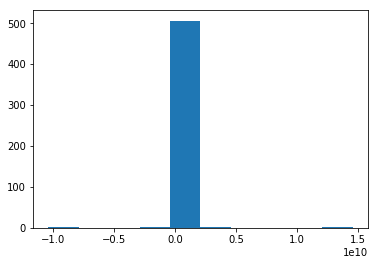

In [213]:
plt.hist(f.ravel())

In [238]:
# sqrt percentage error
imgs_pdiff_list = [] #percent
for i in range(1,3,1):
    imgs_pdiff_list.append(np.sqrt(
        np.sum(
            ((encoded_imgs[0] - encoded_imgs[i])/encoded_imgs[0])**2 )
        )/(2*2*128)
    )

In [239]:
imgs_pdiff_list

[1454281.0, 1501097.125]

#### Image restore from encoded imgs and perturb imgs

In [240]:
# general restore
dimgs = decoder.predict(encoded_imgs)

# with noise
pertb = np.random.normal(0,np.std(encoded_imgs),3*2*2*128).reshape(3,2,2,128)
dimgs_pertb = decoder.predict(encoded_imgs+pertb ) 

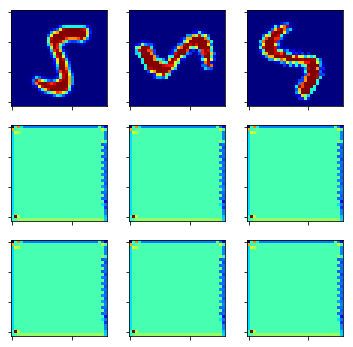

In [241]:
f,a=plt.subplots(3,3,figsize=(6,6))
for  idx in range(3):
    a[0][idx].imshow(np.reshape(rtest_imgs_np[idx],(32,32)), cmap='jet')
    a[1][idx].imshow(np.reshape(dimgs[idx],(32,32)), cmap='jet')
    a[2][idx].imshow(np.reshape(dimgs_pertb[idx],(32,32)), cmap='jet')
    for j in range(3):
        a[j][idx].set_xticklabels([])
        a[j][idx].set_yticklabels([])
plt.show()

-----------------------
62420936
##### Check similarity of z for 0-360 degree
- make (2,2,128) --> (2 by 2 by 128) vector
- take cosinsimilarity?

In [242]:
from sklearn.metrics.pairwise import cosine_similarity

(1, 32, 32, 1)


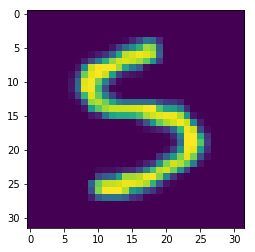

In [356]:
# get one image
idx = np.where(y_test == 5)[0][120]
#print(idx)
test_img = test_imgs[idx].reshape(1,32,32,1)
print(test_img.shape)
plt.imshow(test_img.reshape(32,32))

In [357]:
angles = tf.constant(math.pi/180*np.array([i for i in range(0,360,2)]), dtype=tf.float32)
ctest_imgs = np.concatenate([ test_img.copy() for i in range(180)], axis=0)
print("check shape {}".format(ctest_imgs.shape))
rtest_imgs = _rot_fn(ctest_imgs, angles)

check shape (180, 32, 32, 1)


In [358]:
# get encoder vector by flatten
rtest_imgs_np = tf.keras.backend.eval(rtest_imgs)
encoded_imgs = encoder.predict(rtest_imgs_np)
encs_array = []
for i in encoded_imgs:
    encs_array.append(i.flatten().reshape(1,-1) )

In [370]:
cos_sim_list = []
x = encs_array[0]
for i in range(1,180,1):
    cos_sim_list.extend(cosine_similarity(x, encs_array[i]))
cos_sim_array = np.hstack(np.asarray(cos_sim_list))

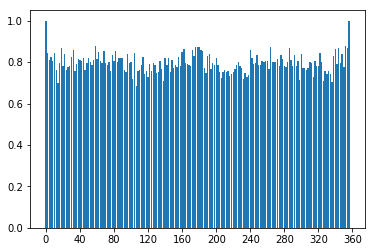

In [373]:
plt.bar([i for i in range(len(cos_sim_array))], cos_sim_array)
plt.xticks([i for i in range(0,len(cos_sim_array)+21, 20)],
          [str(i) for i in range(0,361,40)]
          )
plt.show()

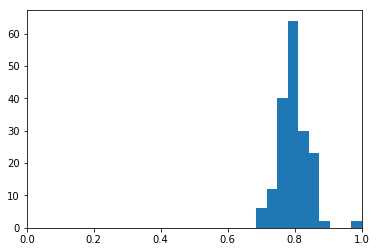

In [376]:
plt.hist(cos_sim_array)
plt.xlim(0,1)
plt.show()

- Visalization

In [381]:
embedded = TSNE(n_components=2).fit_transform( np.squeeze(encoded_imgs.mean(axis=(1,2))) )

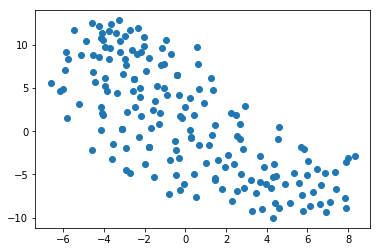

In [382]:
plt.scatter(embedded[:,0], embedded[:,1])

In [383]:
_c =  get_rand_colors(n=4, cmap_name='tab10')

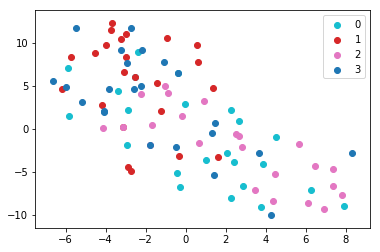

In [384]:
for i in range(4):
    idx = np.array([j for j in range(45*i, 45*(i+1),2)])
    plt.scatter(embedded[idx,0], embedded[idx,1], color=_c[i], label='{}'.format(i))
plt.legend()
plt.show()

---------------
## After advised by David

### 62417609 only reconst loss

In [181]:
# digit == 5
idx = np.where(y_test == 5)[0][280]
oimgs_np = test_imgs[idx].reshape(1,32,32,1)
imgs_np = np.concatenate(
            np.asarray([oimgs_np.copy() for i in range(3)]), axis=0
        )
angles = tf.constant(math.pi/180*np.array([0,120,240]), dtype=tf.float32)
rtest_imgs = _rot_fn(imgs_np, angles)
rimgs_np = tf.keras.backend.eval(rtest_imgs)
print('rimgs_np shape {}'.format(rimgs_np.shape))

rimgs_np shape (3, 32, 32, 1)


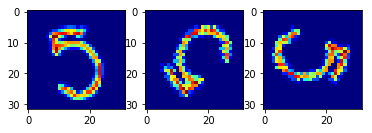

In [182]:
for i in range(3):
    ax = plt.subplot(1,3,i+1)
    plt.imshow(rimgs_np[i].reshape(32,32), cmap='jet')
plt.show()

In [184]:
expname = "62417609"
# directory
model_dir = "./output_model/"+expname
# model
encoder = load_model(model_dir, epoch=14, mtype='encoder')
decoder = load_model(model_dir, epoch=14, mtype='decoder')

 Load encoder at 14 epoch
 Load decoder at 14 epoch


In [185]:
encoded_imgs = encoder.predict(rimgs_np)
results = decoder.predict(encoded_imgs)

optimized angle ~= 134,136,138

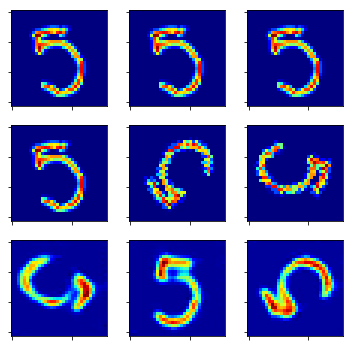

In [188]:
f,a=plt.subplots(3,3,figsize=(6,6))
for  idx in range(3):
    a[0][idx].imshow(np.reshape(oimgs_np,(32,32)), cmap='jet')
    a[1][idx].imshow(np.reshape(rimgs_np[idx],(32,32)), cmap='jet')
    a[2][idx].imshow(np.reshape(results[idx],(32,32)), cmap='jet')
    for j in range(3):
        a[j][idx].set_xticklabels([])
        a[j][idx].set_yticklabels([])
plt.show()

In [190]:
fname = glob.glob('./log/loss*'+expname+'*.txt')[0]
loss_list = []
with open(fname,'r') as f:
    lines = f.readlines()
    for line in lines:
        loss_list.append(float(line))

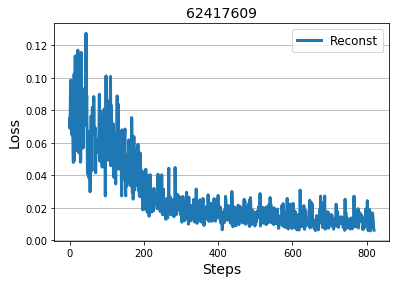

In [193]:
label_list = [
    'Reconst',
    'Bottleneck'
]
x = np.array([i for i in range(len(loss_list))])
plt.plot(x, loss_list, label=label_list[0], linewidth=3)
#plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

In [194]:
fname = glob.glob('./log/degree*'+expname+'*.txt')[0]
degree_list = []
with open(fname,'r') as f:
    lines = f.readlines()
    for line in lines:
        degree_list.append(float(line))

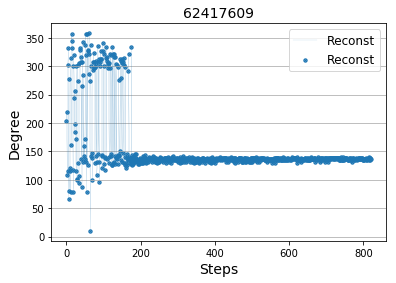

In [195]:
label_list = [
    'Reconst',
    'Bottleneck'
]

x = np.array([i for i in range(len(degree_list))])
plt.scatter(x, degree_list, label=label_list[0], linewidth=3, s=2)
plt.plot(x, degree_list, label=label_list[0], linewidth=0.1)
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Degree', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

----------------------------------
### Training with boss loss term

62419943: lambda 1.0

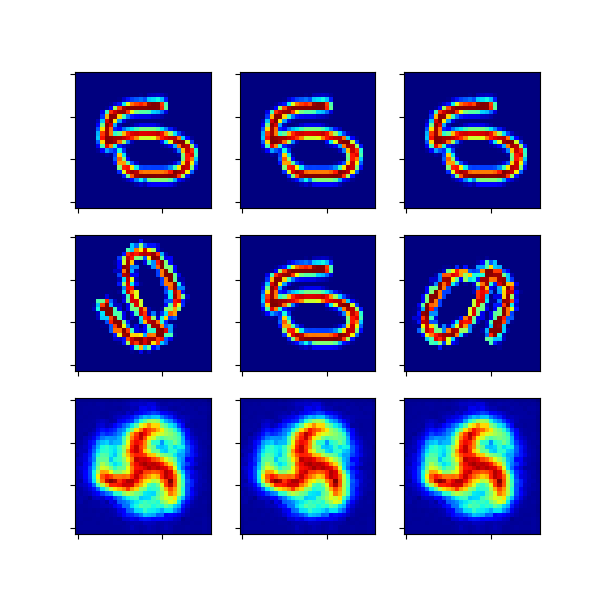

In [306]:
expname = '62419943'
display_png(Image(glob.glob('./fig/fig_62411377_nepoch-10*.png')[0]))

In [307]:
logname=os.path.basename(glob.glob('./log/loss_*'+expname+'*')[0])
loss_array = get_loss(logname, c_lambda=1.0)

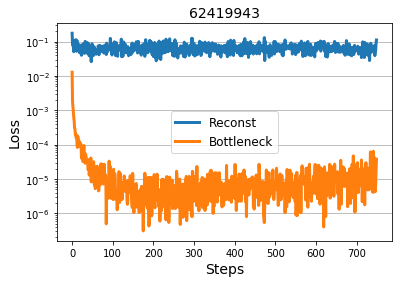

In [308]:
label_list = [
    'Reconst',
    'Bottleneck'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

In [310]:
logname=os.path.basename(glob.glob('./log/degree_'+expname+'*.txt')[0])
degree_array = get_angle(logname)

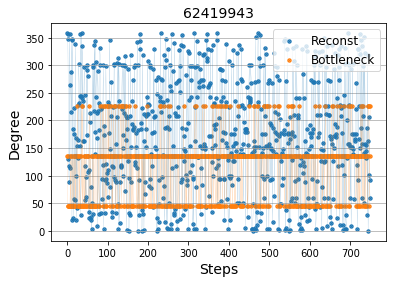

In [311]:
label_list = [
    'Reconst',
    'Bottleneck'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.scatter(x, degree_array[:,i], label=label_list[i], linewidth=3, s=2)
    plt.plot(x, degree_array[:,i], linewidth=0.1)
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Degree', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

------------
## 09/11 Night after modify rotation fn

62420936 Only Rotate/Bottleneck loss

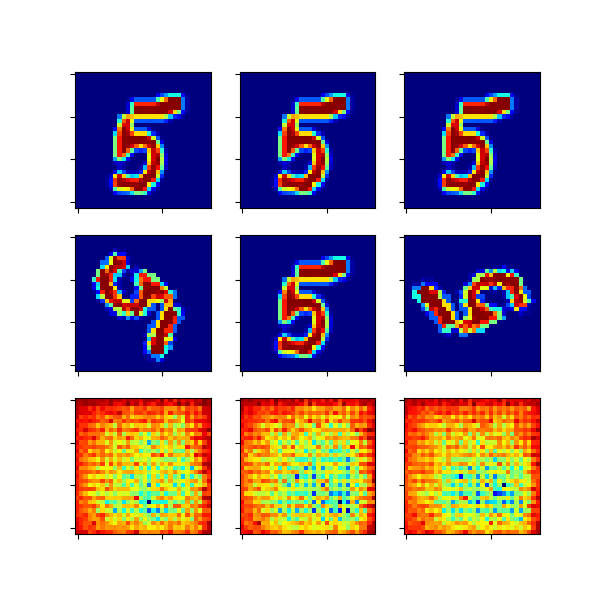

In [339]:
expname = '62420936'
display_png(Image(glob.glob('./fig/*'+expname+'*.png')[0]))

In [351]:
# directory
model_dir = "./output_model/62420936"
# model
encoder = load_model(model_dir, epoch=14, mtype='encoder')
decoder = load_model(model_dir, epoch=14, mtype='decoder')

 Load encoder at 14 epoch
 Load decoder at 14 epoch


In [314]:
logname=os.path.basename(glob.glob('./log/*'+expname+'*.txt')[0])
loss_array = get_loss(logname, c_lambda=1.0)

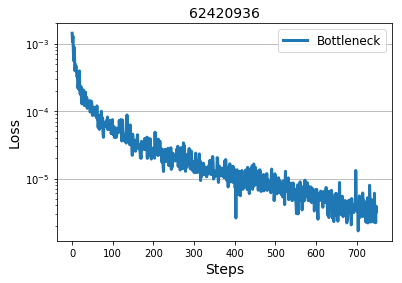

In [315]:
label_list = [
    'Reconst',
    'Bottleneck'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(1,2,1):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

In [316]:
logname=os.path.basename(glob.glob('./log/degree_'+expname+'*.txt')[0])
degree_array = get_angle(logname)

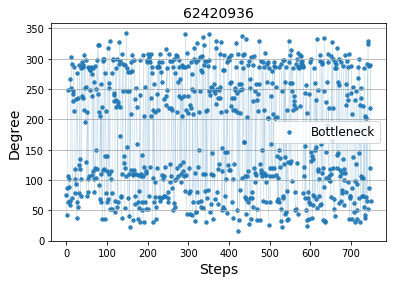

In [317]:
label_list = [
    'Reconst',
    'Bottleneck'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(1,2,1):
    plt.scatter(x, degree_array[:,i], label=label_list[i], linewidth=3, s=2)
    plt.plot(x, degree_array[:,i], linewidth=0.1)
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Degree', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

- Check bottleneck Z's similarity

In [318]:
# get one image
idx = np.where(y_test == 5)[0][128]
test_img = test_imgs[idx].reshape(1,32,32,1)
print(test_img.shape)

(1, 32, 32, 1)


In [319]:
angles = tf.constant(math.pi/180*np.array([0,120,240]), dtype=tf.float32)
ctest_imgs = np.concatenate([ test_img.copy() for i in range(3)], axis=0)
print("check shape {}".format(ctest_imgs.shape))
rtest_imgs = _rot_fn(ctest_imgs, angles)

check shape (3, 32, 32, 1)


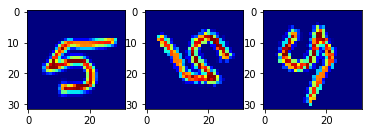

In [320]:
#rtest_imgs_np = tf.keras.backend.eval(rtest_imgs)
with tf.Session() as sess:
    rtest_imgs_np = rtest_imgs.eval()
    plt.figure()
    for i in range(3):
        ax = plt.subplot(1,3,i+1)
        plt.imshow(rtest_imgs_np[i].reshape(32,32), cmap='jet')
    plt.show()

In [321]:
rtest_imgs_np = tf.keras.backend.eval(rtest_imgs)
encoded_imgs = encoder.predict(rtest_imgs_np)

In [322]:
# sqrt mean diff
imgs_diff_list = []
for (i,j) in itertools.combinations([0,1,2],2):
    imgs_diff_list.append(np.sqrt(
        np.sum((encoded_imgs[i] - encoded_imgs[j])**2 ))/(2*2*128)
    )

In [323]:
iid = 0
for (i,j) in itertools.combinations([0,1,2],2):
    print(i,j,imgs_diff_list[iid])
    iid+=1

0 1 6.252185994526371e-05
0 2 5.759460691479035e-05
1 2 5.08549710502848e-05


In [324]:
np.mean(encoded_imgs)

0.0004361861

In [329]:
# sqrt percentage error
imgs_pdiff_list = [] #percent
for i in range(1,3,1):
    imgs_pdiff_list.append(np.sqrt(
        np.sum(
            ((encoded_imgs[0] - encoded_imgs[i])/(encoded_imgs[0]+1.0e-32))**2 )
        )/(2*2*128)
    )
print(imgs_pdiff_list)

[71989768.0, 9050500.0]


/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  1.,   0.,   0.,   0.,   0.,   0.,   1., 503.,   1.,   2.]),
 array([-3.43050342e+10, -2.98864087e+10, -2.54677852e+10, -2.10491597e+10,
        -1.66305341e+10, -1.22119086e+10, -7.79328410e+09, -3.37465907e+09,
         1.04396595e+09,  5.46259098e+09,  9.88121600e+09], dtype=float32),
 <a list of 10 Patch objects>)

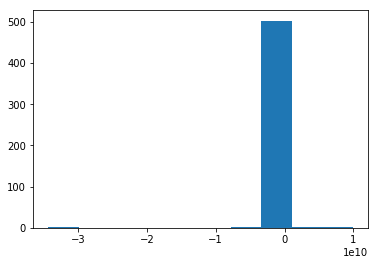

In [330]:
f = (encoded_imgs[0] - encoded_imgs[1])/encoded_imgs[0]
plt.hist(f.ravel())

cosine simi

(1, 32, 32, 1)


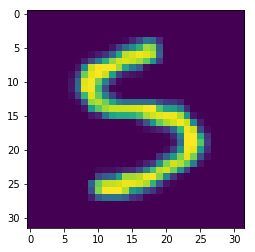

In [334]:
# get one image
idx = np.where(y_test == 5)[0][120]
#print(idx)
test_img = test_imgs[idx].reshape(1,32,32,1)
print(test_img.shape)
plt.imshow(test_img.reshape(32,32))

In [341]:
angles = tf.constant(math.pi/180*np.array([i for i in range(0,360,2)]), dtype=tf.float32)
ctest_imgs = np.concatenate([ test_img.copy() for i in range(180)], axis=0)
print("check shape {}".format(ctest_imgs.shape))
rtest_imgs = _rot_fn(ctest_imgs, angles)

check shape (180, 32, 32, 1)


In [355]:
# get encoder vector by flatten
rtest_imgs_np = tf.keras.backend.eval(rtest_imgs)
encoded_imgs = encoder.predict(rtest_imgs_np)
encs_array = []
for i in encoded_imgs:
    encs_array.append(i.flatten().reshape(1,-1) )

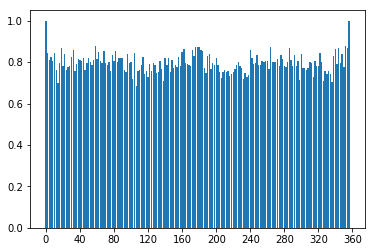

In [386]:
plt.bar([i for i in range(len(cos_sim_array))], cos_sim_array)
plt.xticks([i for i in range(0,len(cos_sim_list)+21, 20)],
          [str(i) for i in range(0,361,40)]
          )
plt.show()

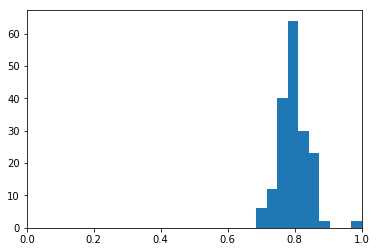

In [390]:
plt.hist(cos_sim_array)
plt.xlim(0,1)
plt.show()

##### perterbation

In [352]:
angles = tf.constant(math.pi/180*np.array([0,120,240]), dtype=tf.float32)
ctest_imgs = np.concatenate([ test_img.copy() for i in range(3)], axis=0)
print("check shape {}".format(ctest_imgs.shape))
rtest_imgs = _rot_fn(ctest_imgs, angles)

rtest_imgs_np = tf.keras.backend.eval(rtest_imgs)
encoded_imgs = encoder.predict(rtest_imgs_np)

# general restore
dimgs = decoder.predict(encoded_imgs)

# with noise
pertb = np.random.normal(0,np.std(encoded_imgs),3*2*2*128).reshape(3,2,2,128)
dimgs_pertb = decoder.predict(encoded_imgs+pertb ) 

check shape (3, 32, 32, 1)


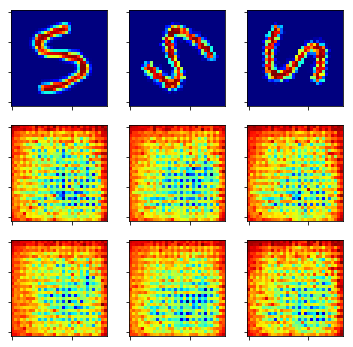

In [353]:
f,a=plt.subplots(3,3,figsize=(6,6))
for  idx in range(3):
    a[0][idx].imshow(np.reshape(rtest_imgs_np[idx],(32,32)), cmap='jet')
    a[1][idx].imshow(np.reshape(dimgs[idx],(32,32)), cmap='jet')
    a[2][idx].imshow(np.reshape(dimgs_pertb[idx],(32,32)), cmap='jet')
    for j in range(3):
        a[j][idx].set_xticklabels([])
        a[j][idx].set_yticklabels([])
plt.show()

-----------------------------
## Job: 09/11-12 night

In [413]:
def _get_loss(log_fname, c_lambda):
    # check ltrain-reconst-oss curve
    fname = './log/'+log_fname
    loss_list = []
    with open(fname,'r') as f:
        lines = f.readlines()
        for line in lines:
            tmps = []
            for iline in line.split('\n'):
                for _line in iline.split(' '):
                    if len(_line) > 0:
                        tmps.append(float(_line))
            loss_list.append(np.array(tmps))
    
    n = len(loss_list)
    loss_array = np.zeros((n,2))
    loss_array = loss_array.astype(float)
    for idx, i in enumerate(loss_list):
        #print(i, len(i))
        for jdx, j in enumerate(i):
            if jdx == 0:
                loss_array[idx, jdx] = j
            if jdx == 1:
                loss_array[idx, jdx] = j * c_lambda
    return loss_array

In [417]:
def _get_angle(fname):
    return _get_loss(fname, c_lambda=1.0)

###  62421594

In [410]:
expname = '62421594'

In [414]:
logname=os.path.basename(glob.glob('./log/loss*'+expname+'*.txt')[0])
print(os.path.basename(logname))
loss_array = _get_loss(logname, c_lambda=1.0)

loss_62421594_lambda1.0_epoch50.txt


In [415]:
loss_array.shape

(1941, 2)

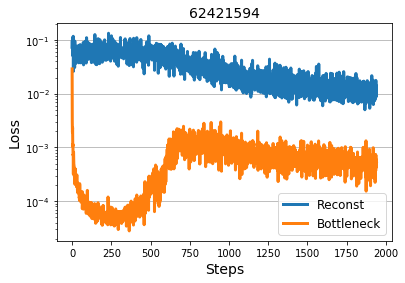

In [416]:
label_list = [
    'Reconst',
    'Bottleneck'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.plot(x, loss_array[:,i], label=label_list[i], linewidth=3)
plt.yscale('log')
plt.legend(fontsize=12)
plt.gca().yaxis.grid()
plt.title(str(expname), fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

In [419]:
logname=os.path.basename(glob.glob('./log/degree_'+expname+'*.txt')[0])
degree_array = _get_angle(logname)

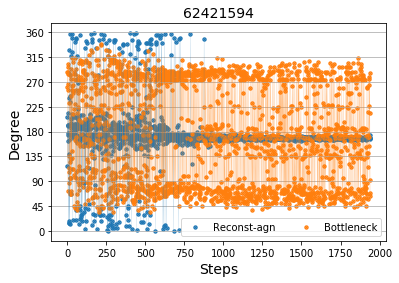

In [451]:
label_list = [
    'Reconst-agn',
    'Bottleneck'
]

x = np.array([i for i in range(loss_array.shape[0])])
for i in range(2):
    plt.scatter(x, degree_array[:,i], label=label_list[i], linewidth=3, s=2)
    plt.plot(x, degree_array[:,i], linewidth=0.1)
plt.legend(fontsize=10, ncol=2)
plt.gca().yaxis.grid()
plt.yticks([i for i in range(0,361, 45)])
plt.title(str(expname), fontsize=14)
plt.ylabel('Degree', fontsize=14)
plt.xlabel('Steps', fontsize=14)
plt.show()

###### Compare reconstructed images and latent representation

In [424]:
# directory
model_dir = "./output_model/"+expname
# model
encoder = load_model(model_dir, epoch=37, mtype='encoder')
decoder = load_model(model_dir, epoch=37, mtype='decoder')

 Load encoder at 37 epoch
 Load decoder at 37 epoch


Select ONE original image

(1, 32, 32, 1)


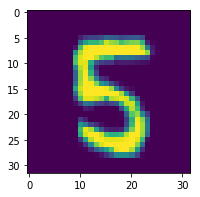

In [428]:
# get one image
idx = np.where(y_test == 5)[0][34]
test_img = test_imgs[idx].reshape(1,32,32,1)
print(test_img.shape)
plt.figure(figsize=(3,3))
plt.imshow(test_img.reshape(32,32))
plt.show()

Make copy images with rotating degree = {0,120,240}

In [430]:
angles = tf.constant(math.pi/180*np.array([0,120,240]), dtype=tf.float32)
ctest_imgs = np.concatenate([ test_img.copy() for i in range(3)], axis=0)
print("check shape {}".format(ctest_imgs.shape))
rtest_imgs = _rot_fn(ctest_imgs, angles)
rimgs = tf.keras.backend.eval(rtest_imgs)

check shape (3, 32, 32, 1)


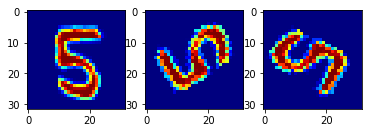

In [432]:
for i in range(3):
    ax = plt.subplot(1,3,i+1)
    plt.imshow(rimgs[i].reshape(32,32), cmap='jet')
plt.show()

Generate encoder/encoder-decoder images

In [433]:
encoded_imgs = encoder.predict(rimgs)
decoded_imgs = decoder.predict(encoded_imgs)

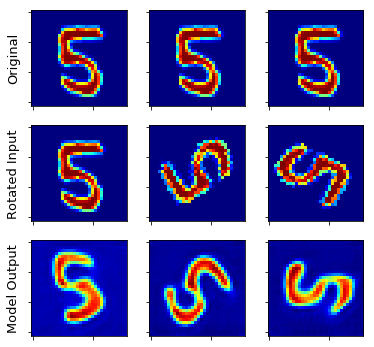

In [439]:
f,a=plt.subplots(3,3,figsize=(6,6))
for  idx in range(3):
    a[0][idx].imshow(np.reshape(test_img,(32,32)), cmap='jet')
    a[1][idx].imshow(np.reshape(rimgs[idx],(32,32)), cmap='jet')
    a[2][idx].imshow(np.reshape(decoded_imgs[idx],(32,32)), cmap='jet')
    for j in range(3):
        a[j][idx].set_xticklabels([])
        a[j][idx].set_yticklabels([])
    if idx == 0:
        ylabel_names = ['Original', 'Rotated Input', 'Model Output']
        for j in range(3):
            a[j][0].set_ylabel(ylabel_names[j], fontsize=13)
plt.show()

Similarity of z

In [452]:
encoded_imgs.shape

(3, 2, 2, 128)

In [457]:
encs_list = []
for i in range(3):
    encs_list.append(encoded_imgs[i].ravel().reshape(1,-1))
encs_vec = np.array(encs_list)

cos_sims = []
for (i,j) in itertools.combinations([0,1,2], 2):
    x, y = encs_vec[i], encs_vec[j]
    cos_sims.extend(cosine_similarity(x,y))
cos_sims

[array([0.9420788], dtype=float32),
 array([0.9487062], dtype=float32),
 array([0.93145573], dtype=float32)]

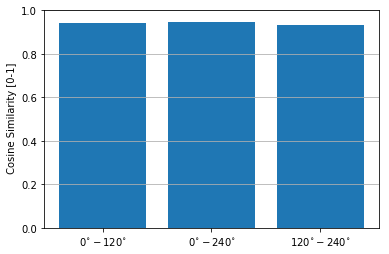

In [472]:
plt.figure()
plt.bar([0,1,2],np.hstack(cos_sims) )
plt.xticks( [0,1,2],
           [r'$0^{\circ}-120^{\circ}$', r'$0^{\circ}-240^{\circ}$', r'$120^{\circ}-240^{\circ}$'])
plt.ylim(0,1.0001)
plt.ylabel(" Cosine Similarity [0-1]")
plt.gca().yaxis.grid()
plt.show()